In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math
from sklearn import metrics
import pickle
%matplotlib inline
from IPython.display import HTML

In [ ]:
df=pd.read_csv("train.csv")

<Axes: xlabel='INPUT_VALUE_ID_FOR_tax_lien_amount', ylabel='Density'>

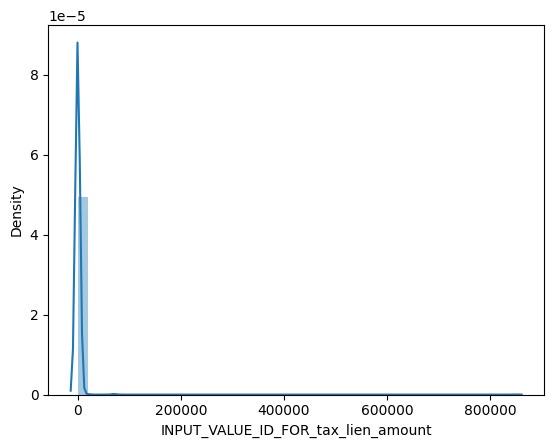

In [ ]:
sns.distplot(df['INPUT_VALUE_ID_FOR_tax_lien_amount'])

<Axes: xlabel='INPUT_VALUE_ID_FOR_tax_lien_amount', ylabel='Density'>

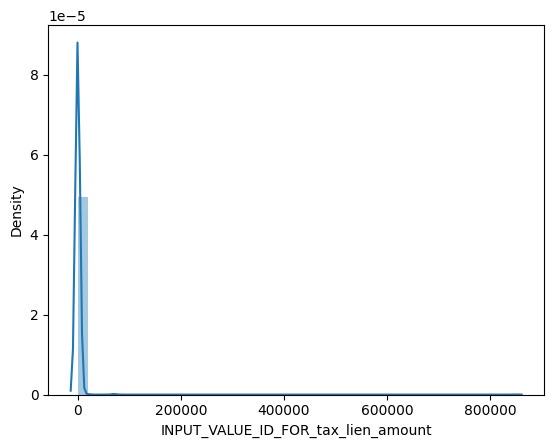

In [ ]:
sns.distplot(df['INPUT_VALUE_ID_FOR_tax_lien_amount'])

In [ ]:
# sns.distplot(df['NPUT_VALUE_ID_FOR_judgement_lien_amount'])

<Axes: xlabel='INPUT_VALUE_ID_FOR_tax_lien_percent', ylabel='Density'>

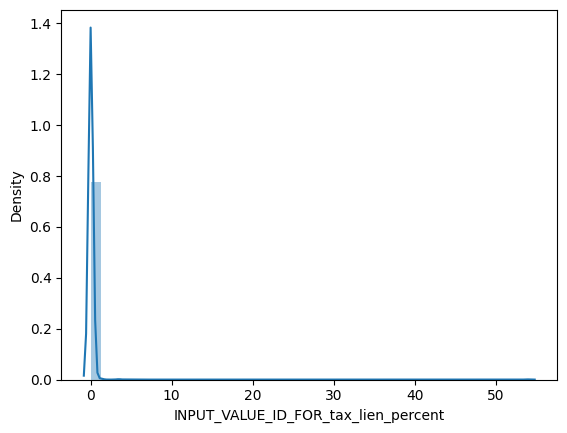

In [ ]:
sns.distplot(df['INPUT_VALUE_ID_FOR_tax_lien_percent'])

<Axes: xlabel='judgement_lien_percent', ylabel='Density'>

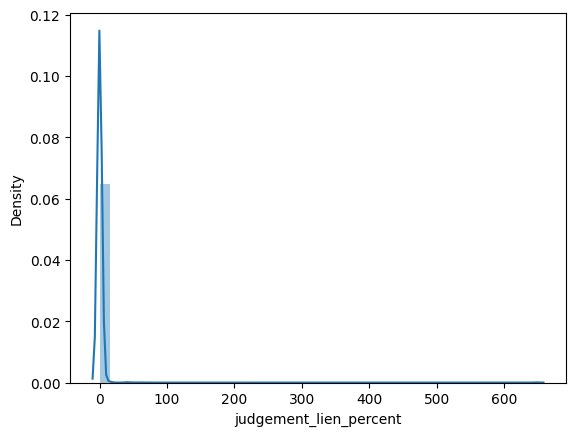

In [ ]:
sns.distplot(df['judgement_lien_percent'])

In [ ]:
df.head()

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485.0,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299.0,Paid in full


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   id                                        1810 non-null   int64  
 2   owner_1_score                             1786 non-null   float64
 3   RATE_owner_1                              1780 non-null   object 
 4   CAP_AMOUNT_owner_1                        1775 non-null   float64
 5   PERCENT_OWN_owner_1                       1793 non-null   float64
 6   owner_2_score                             214 non-null    float64
 7   RATE_owner_2                              214 non-null    object 
 8   CAP_AMOUNT_owner_2                        202 non-null    float64
 9   PERCENT_OWN_owner_2                       259 non-null    float64
 10  owner_3_score                       

In [ ]:
# df['owner_1_score'] = df['owner_1_score'].replace(np.nan, 0)
# df['owner_2_score'] = df['owner_2_score'].replace(np.nan, 0)
# df['owner_3_score'] = df['owner_3_score'].replace(np.nan, 0)
# #--------------------------------------------------------------------#
# df['RATE_owner_1'] = df['RATE_owner_1'].replace(np.nan, 0)
# df['RATE_owner_2'] = df['RATE_owner_2'].replace(np.nan, 0)
# df['RATE_owner_3'] = df['RATE_owner_3'].replace(np.nan, 0)
# #---------------------------------------------------------------------#
# df['CAP_AMOUNT_owner_1'] = df['CAP_AMOUNT_owner_1'].replace(np.nan, 0)
# df['CAP_AMOUNT_owner_2'] = df['CAP_AMOUNT_owner_2'].replace(np.nan, 0)
# df['CAP_AMOUNT_owner_3'] = df['CAP_AMOUNT_owner_3'].replace(np.nan, 0)


In [ ]:
# df['owners_score_combined'] = df['owner_1_score'] + df['owner_2_score']+df['owner_3_score']
# df.drop(['owner_1_score', 'owner_2_score','owner_3_score'], axis='columns', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   id                                        1810 non-null   int64  
 2   owner_1_score                             1786 non-null   float64
 3   RATE_owner_1                              1780 non-null   object 
 4   CAP_AMOUNT_owner_1                        1775 non-null   float64
 5   PERCENT_OWN_owner_1                       1793 non-null   float64
 6   owner_2_score                             214 non-null    float64
 7   RATE_owner_2                              214 non-null    object 
 8   CAP_AMOUNT_owner_2                        202 non-null    float64
 9   PERCENT_OWN_owner_2                       259 non-null    float64
 10  owner_3_score                       

In [ ]:
df.shape

(1810, 56)

In [ ]:
df.isnull().sum()

Unnamed: 0                                     0
id                                             0
owner_1_score                                 24
RATE_owner_1                                  30
CAP_AMOUNT_owner_1                            35
PERCENT_OWN_owner_1                           17
owner_2_score                               1596
RATE_owner_2                                1596
CAP_AMOUNT_owner_2                          1608
PERCENT_OWN_owner_2                         1551
owner_3_score                               1800
RATE_owner_3                                1800
CAP_AMOUNT_owner_3                          1800
PERCENT_OWN_owner_3                         1768
years_in_business                             16
RATE_ID_FOR_years_in_business                 16
fsr                                          495
RATE_ID_FOR_fsr                             1791
location                                      11
RATE_ID_FOR_location                          74
funded_last_30      

In [ ]:
df = df.drop_duplicates()
df.shape

(1810, 56)

In [ ]:
df.drop('id', axis = 1,inplace =True)
df.drop('owner_2_score', axis = 1,inplace =True)
df.drop('RATE_owner_2', axis = 1,inplace =True)
df.drop('CAP_AMOUNT_owner_2', axis = 1,inplace =True)
df.drop('PERCENT_OWN_owner_2', axis = 1,inplace =True)
df.drop('owner_3_score', axis = 1,inplace =True)
df.drop('RATE_owner_3', axis = 1,inplace =True)
df.drop('CAP_AMOUNT_owner_3', axis = 1,inplace =True)
df.drop('PERCENT_OWN_owner_3', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_fsr', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_funded_last_30', axis = 1,inplace =True)
df.drop('INPUT_VALUE_ID_FOR_judgement_lien_time', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_judgement_lien_time', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_avg_net_deposits', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_industry_type', axis = 1,inplace =True)
 

In [ ]:
df.isnull().sum()

Unnamed: 0                                    0
owner_1_score                                24
RATE_owner_1                                 30
CAP_AMOUNT_owner_1                           35
PERCENT_OWN_owner_1                          17
years_in_business                            16
RATE_ID_FOR_years_in_business                16
fsr                                         495
location                                     11
RATE_ID_FOR_location                         74
funded_last_30                                0
judgement_lien_percent                        0
RATE_ID_FOR_judgement_lien_percent            0
INPUT_VALUE_ID_FOR_judgement_lien_amount      0
RATE_ID_FOR_judgement_lien_amount             0
INPUT_VALUE_ID_FOR_num_negative_days          0
RATE_ID_FOR_num_negative_days                 2
INPUT_VALUE_ID_FOR_num_deposits               0
RATE_ID_FOR_num_deposits                      0
INPUT_VALUE_ID_FOR_monthly_gross              0
RATE_ID_FOR_monthly_gross               

In [ ]:
df.head()

,Unnamed: 0,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,...,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,606.0,A,150000.0,100.0,2.07,A,NaN,Home,A,...,0.0,A,0.00,preferred,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,703.0,A,150000.0,100.0,26.57,A,73.0,Verified,A,...,1.0,A,107027.25,preferred,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,692.0,A,150000.0,100.0,42.10,A,19.0,Home,A,...,0.0,A,0.00,preferred,692.0,A,150000.0,100.0,6485.0,Default
3,1670,684.0,A,150000.0,100.0,5.53,A,NaN,Home,A,...,0.0,A,0.00,preferred,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,625.0,A,150000.0,100.0,1.65,B,NaN,Home,A,...,0.0,A,0.00,preferred,625.0,A,150000.0,100.0,5299.0,Paid in full


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 0 to 1809
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   owner_1_score                             1786 non-null   float64
 2   RATE_owner_1                              1780 non-null   object 
 3   CAP_AMOUNT_owner_1                        1775 non-null   float64
 4   PERCENT_OWN_owner_1                       1793 non-null   float64
 5   years_in_business                         1794 non-null   float64
 6   RATE_ID_FOR_years_in_business             1794 non-null   object 
 7   fsr                                       1315 non-null   float64
 8   location                                  1799 non-null   object 
 9   RATE_ID_FOR_location                      1736 non-null   object 
 10  funded_last_30                      

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

RATE_owner_1
RATE_ID_FOR_years_in_business
location
RATE_ID_FOR_location
funded_last_30
RATE_ID_FOR_judgement_lien_percent
RATE_ID_FOR_judgement_lien_amount
RATE_ID_FOR_num_negative_days
RATE_ID_FOR_num_deposits
RATE_ID_FOR_monthly_gross
RATE_ID_FOR_average_ledger
RATE_ID_FOR_fc_margin
RATE_ID_FOR_tax_lien_amount
RATE_ID_FOR_tax_lien_percent
RATE_ID_FOR_tax_lien_count
RATE_ID_FOR_current_position
INPUT_VALUE_ID_FOR_industry_type
RATE_owner_4
completion_status


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

RATE_owner_1: ['A' 'B' 'C' nan 'D' 'R']
RATE_ID_FOR_years_in_business: ['A' 'B' 'C' 'D' nan]
location: ['Home' 'Verified' 'Unknown' nan 'BRICK']
RATE_ID_FOR_location: ['A' nan]
funded_last_30: ['N' 'Y']
RATE_ID_FOR_judgement_lien_percent: ['A' 'D' 'C' 'B']
RATE_ID_FOR_judgement_lien_amount: ['A' 'D']
RATE_ID_FOR_num_negative_days: ['A' 'B' 'C' 'D' nan]
RATE_ID_FOR_num_deposits: ['R' 'A' 'C' 'B']
RATE_ID_FOR_monthly_gross: ['D' 'A']
RATE_ID_FOR_average_ledger: ['D' 'A']
RATE_ID_FOR_fc_margin: ['D' 'A']
RATE_ID_FOR_tax_lien_amount: ['A' 'D']
RATE_ID_FOR_tax_lien_percent: ['A' 'D']
RATE_ID_FOR_tax_lien_count: ['A' nan 'B']
RATE_ID_FOR_current_position: ['A' 'C' nan 'D']
INPUT_VALUE_ID_FOR_industry_type: ['preferred' 'capped' 'standard' nan 'Preferred']
RATE_owner_4: ['A' 'B' 'C' nan 'D' 'R']
completion_status: ['Paid off with renewal' 'Paid in full' 'Default'
 'Paid via discounted payoff']


In [ ]:
from sklearn import preprocessing

l1 = preprocessing.LabelEncoder()
df['RATE_owner_1'] = l1.fit_transform(df['RATE_owner_1'])

l2 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_years_in_business'] = l2.fit_transform(df['RATE_ID_FOR_years_in_business'])

l3 = preprocessing.LabelEncoder()
df['location'] = l3.fit_transform(df['location'])

l4 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_location'] = l4.fit_transform(df['RATE_ID_FOR_location'])

l5 = preprocessing.LabelEncoder()
df['funded_last_30'] = l5.fit_transform(df['funded_last_30'])

l6 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_judgement_lien_percent'] = l6.fit_transform(df['RATE_ID_FOR_judgement_lien_percent'])

l7 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_judgement_lien_amount'] = l7.fit_transform(df['RATE_ID_FOR_judgement_lien_amount'])

l8 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_num_negative_days'] = l8.fit_transform(df['RATE_ID_FOR_num_negative_days'])

l9 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_num_deposits'] = l9.fit_transform(df['RATE_ID_FOR_num_deposits'])
l10 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_monthly_gross'] = l10.fit_transform(df['RATE_ID_FOR_monthly_gross'])

l11 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_average_ledger'] = l11.fit_transform(df['RATE_ID_FOR_average_ledger'])

l12 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_fc_margin'] = l12.fit_transform(df['RATE_ID_FOR_fc_margin'])

l13 = preprocessing.LabelEncoder()
df[ 'RATE_ID_FOR_tax_lien_amount'] = l13.fit_transform(df[ 'RATE_ID_FOR_tax_lien_amount'])

l14 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_tax_lien_percent'] = l14.fit_transform(df['RATE_ID_FOR_tax_lien_percent'])

l15 = preprocessing.LabelEncoder()
df[ 'RATE_ID_FOR_tax_lien_count'] = l15.fit_transform(df[ 'RATE_ID_FOR_tax_lien_count'])

l16 = preprocessing.LabelEncoder()
df['RATE_ID_FOR_current_position'] = l16.fit_transform(df['RATE_ID_FOR_current_position'])

l17 = preprocessing.LabelEncoder()
df['INPUT_VALUE_ID_FOR_industry_type'] = l17.fit_transform(df['INPUT_VALUE_ID_FOR_industry_type'])

l18 = preprocessing.LabelEncoder()
df['RATE_owner_4'] = l18.fit_transform(df['RATE_owner_4'])

l19 = preprocessing.LabelEncoder()
df['completion_status'] = l19.fit_transform(df['completion_status'])

with open('label_encoder1.pickle', 'wb') as f:
    pickle.dump(l1, f)

with open('label_encoder2.pickle', 'wb') as f:
    pickle.dump(l2, f)
with open('label_encoder3.pickle', 'wb') as f:
    pickle.dump(l3, f)
with open('label_encoder4.pickle', 'wb') as f:
    pickle.dump(l4, f)

with open('label_encoder5.pickle', 'wb') as f:
    pickle.dump(l5, f)
with open('label_encoder6.pickle', 'wb') as f:
    pickle.dump(l6, f)

with open('label_encoder7.pickle', 'wb') as f:
    pickle.dump(l7, f)
with open('label_encoder8.pickle', 'wb') as f:
    pickle.dump(l8, f)

with open('label_encoder1.pickle', 'wb') as f:
    pickle.dump(l1, f)

with open('label_encoder9.pickle', 'wb') as f:
    pickle.dump(l9, f)

with open('label_encoder10.pickle', 'wb') as f:
    pickle.dump(l10, f)

with open('label_encoder11.pickle', 'wb') as f:
    pickle.dump(l11, f)

with open('label_encoder12.pickle', 'wb') as f:
    pickle.dump(l12, f)

with open('label_encoder13.pickle', 'wb') as f:
    pickle.dump(l13, f)

with open('label_encoder14.pickle', 'wb') as f:
    pickle.dump(l14, f)

with open('label_encoder15.pickle', 'wb') as f:
    pickle.dump(l15, f)

with open('label_encoder16.pickle', 'wb') as f:
    pickle.dump(l16, f)

with open('label_encoder17.pickle', 'wb') as f:
    pickle.dump(l17, f)

with open('label_encoder18.pickle', 'wb') as f:
    pickle.dump(l18, f)

with open('label_encoder19.pickle', 'wb') as f:
    pickle.dump(l19, f)


# for col in ['RATE_owner_1', 
#             'RATE_ID_FOR_years_in_business', 
#             'location',
#             'RATE_ID_FOR_location',
#             'funded_last_30',
#             'RATE_ID_FOR_judgement_lien_percent',
#             'RATE_ID_FOR_judgement_lien_amount',
#             'RATE_ID_FOR_num_negative_days',
            
#             ,
#             'RATE_ID_FOR_monthly_gross',
#             'RATE_ID_FOR_average_ledger',
#             'RATE_ID_FOR_fc_margin',
#             'RATE_ID_FOR_tax_lien_amount',
#             'RATE_ID_FOR_tax_lien_percent',
#             'RATE_ID_FOR_tax_lien_count',
#             'RATE_ID_FOR_current_position',
#             'INPUT_VALUE_ID_FOR_industry_type',
#             'RATE_owner_4',
#             'completion_status',
#             ]:
#     df[col] = le.fit_transform(df[col])


In [ ]:
l1.classes_

array(['A', 'B', 'C', 'D', 'R', nan], dtype=object)

In [ ]:
with open('label_encoder1.pickle', 'rb') as file:
    l1 = pickle.load(file)
l1.classes_

array(['A', 'B', 'C', 'D', 'R', nan], dtype=object)

In [ ]:
df['RATE_owner_1'].value_counts()

0    1071
1     381
2     251
3      72
5      30
4       5
Name: RATE_owner_1, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit(df)

with open('KNN1', 'wb') as f:
    pickle.dump(imputed_data, f)
    
imputed_data = imputer.transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df = imputed_df.astype(df.dtypes.to_dict())
df=imputed_df




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   owner_1_score                             1810 non-null   float64
 2   RATE_owner_1                              1810 non-null   int64  
 3   CAP_AMOUNT_owner_1                        1810 non-null   float64
 4   PERCENT_OWN_owner_1                       1810 non-null   float64
 5   years_in_business                         1810 non-null   float64
 6   RATE_ID_FOR_years_in_business             1810 non-null   int64  
 7   fsr                                       1810 non-null   float64
 8   location                                  1810 non-null   int64  
 9   RATE_ID_FOR_location                      1810 non-null   int64  
 10  funded_last_30                      

In [ ]:
df.isnull().sum()

Unnamed: 0                                  0
owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger 

In [ ]:
df.describe()

,Unnamed: 0,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,...,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,...,1810.000000,1810.000000,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,1001.137017,640.252670,0.701105,116476.058932,92.679816,18.115033,0.211050,40.215654,2.265193,0.040884,...,0.720442,0.205525,8.924109e+04,1.998343,655.017127,0.850829,115744.014733,96.967827,3961.659116,1.007735
std,579.155508,446.295938,1.044424,47422.433937,37.013649,126.845385,0.611923,30.211883,0.973589,0.198076,...,0.782576,0.486151,1.664882e+05,0.431611,567.600960,1.274343,48004.579853,34.780810,2156.725892,0.797277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000
25%,499.250000,570.000000,0.000000,100000.000000,100.000000,3.060000,0.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000e+00,2.000000,568.000000,0.000000,100000.000000,100.000000,2311.000000,0.000000
50%,1001.500000,620.000000,0.000000,150000.000000,100.000000,5.760000,0.000000,33.666667,3.000000,0.000000,...,1.000000,0.000000,4.751979e+04,2.000000,622.000000,0.000000,150000.000000,100.000000,4196.500000,1.000000
75%,1499.750000,663.000000,1.000000,150000.000000,100.000000,11.370000,0.000000,69.000000,3.000000,0.000000,...,1.000000,0.000000,1.036317e+05,2.000000,664.750000,1.000000,150000.000000,100.000000,5368.000000,1.000000
max,2011.000000,9002.000000,5.000000,150000.000000,1000.000000,1805.400000,4.000000,99.000000,4.000000,1.000000,...,4.000000,3.000000,2.291481e+06,4.000000,9002.000000,5.000000,150000.000000,1000.000000,9062.000000,3.000000


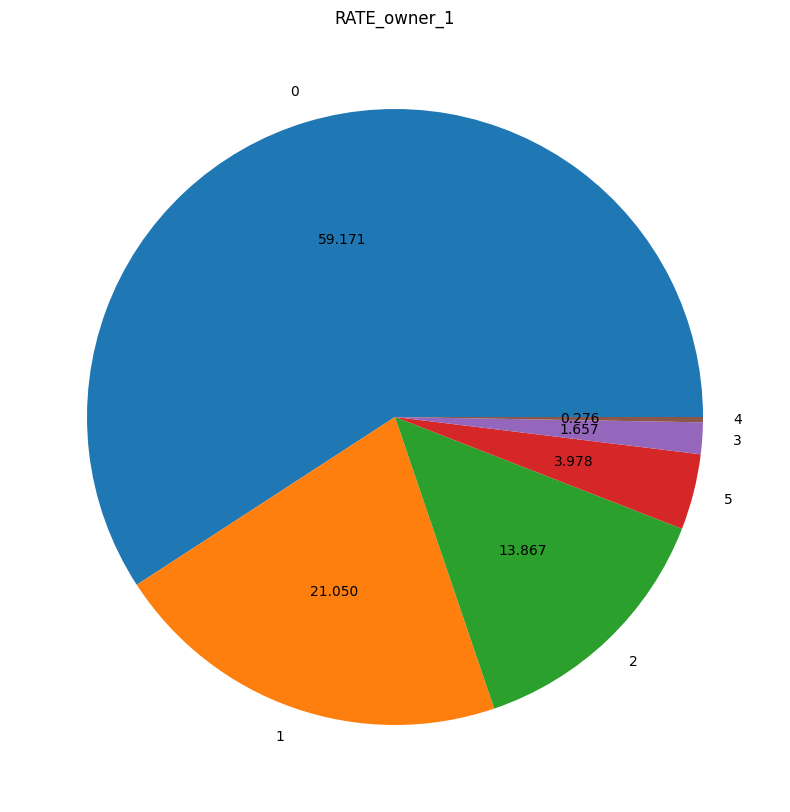

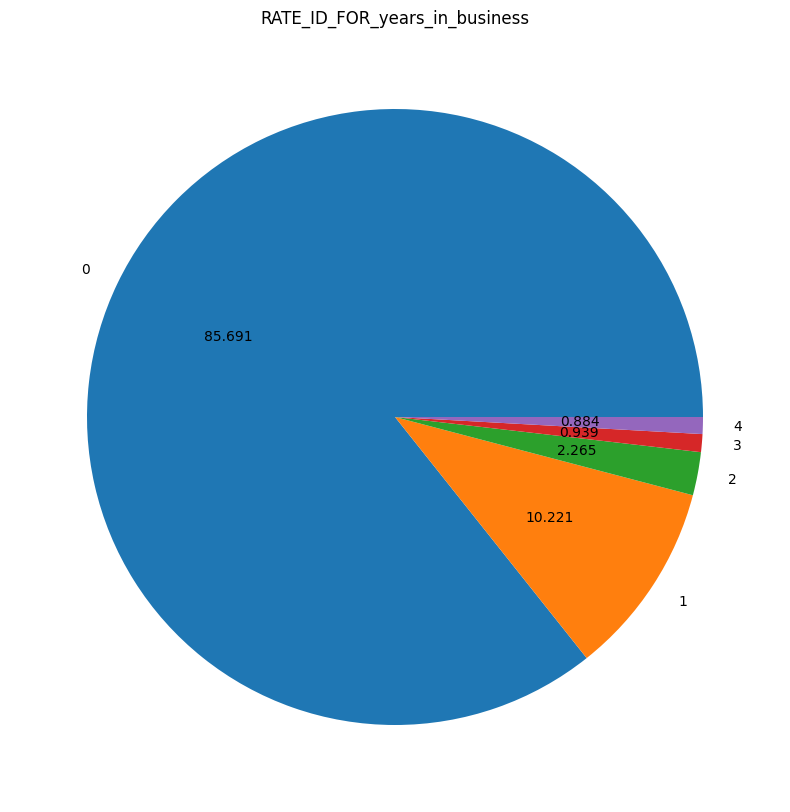

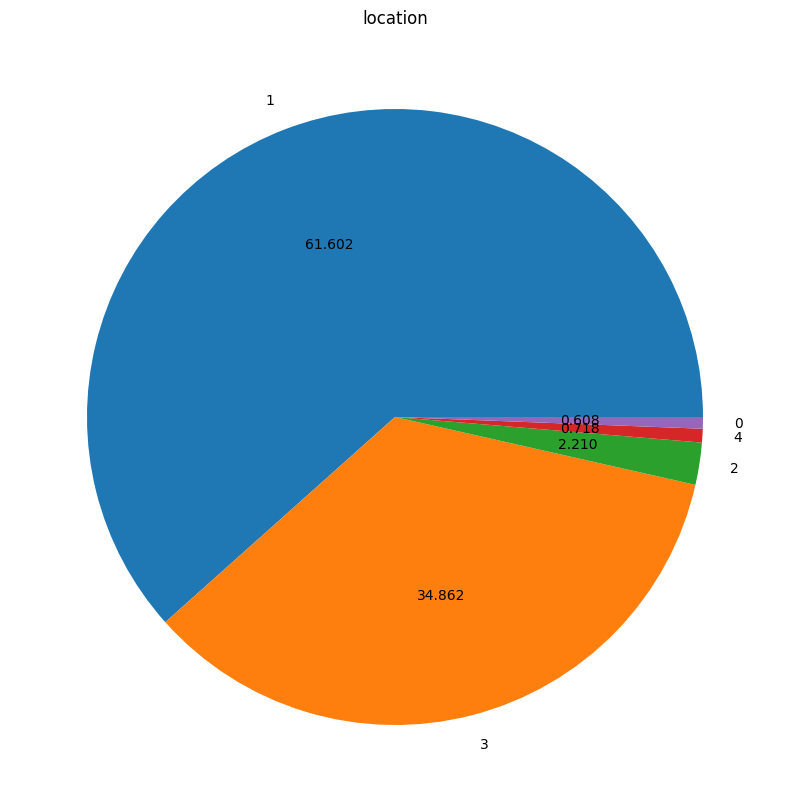

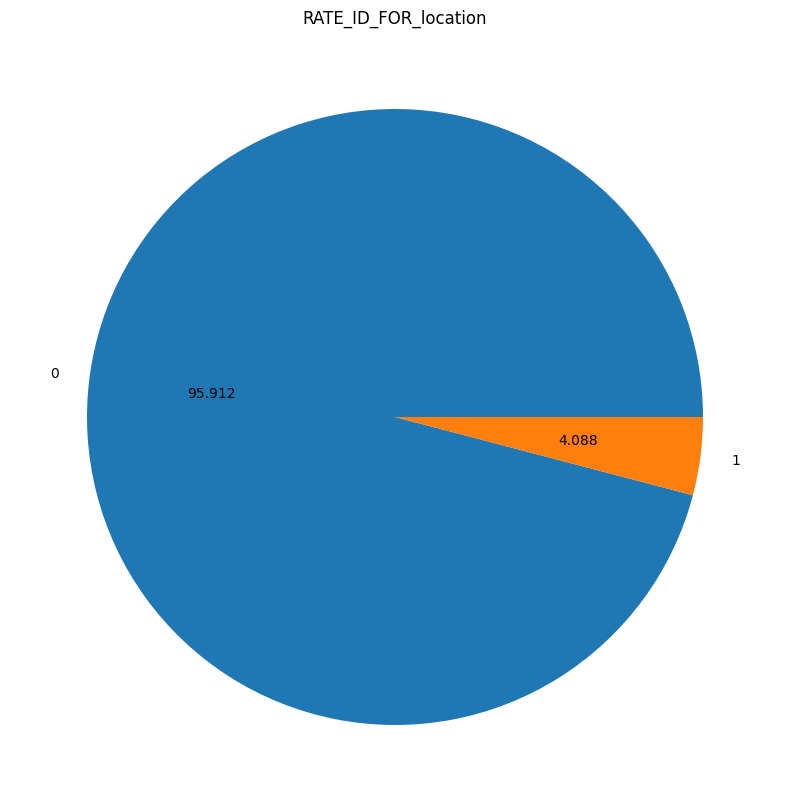

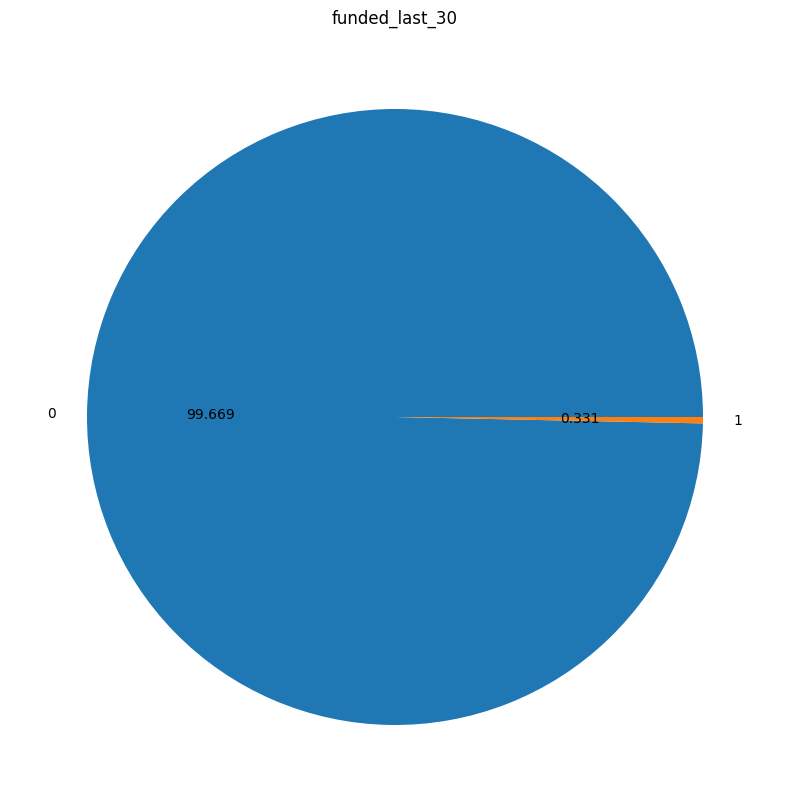

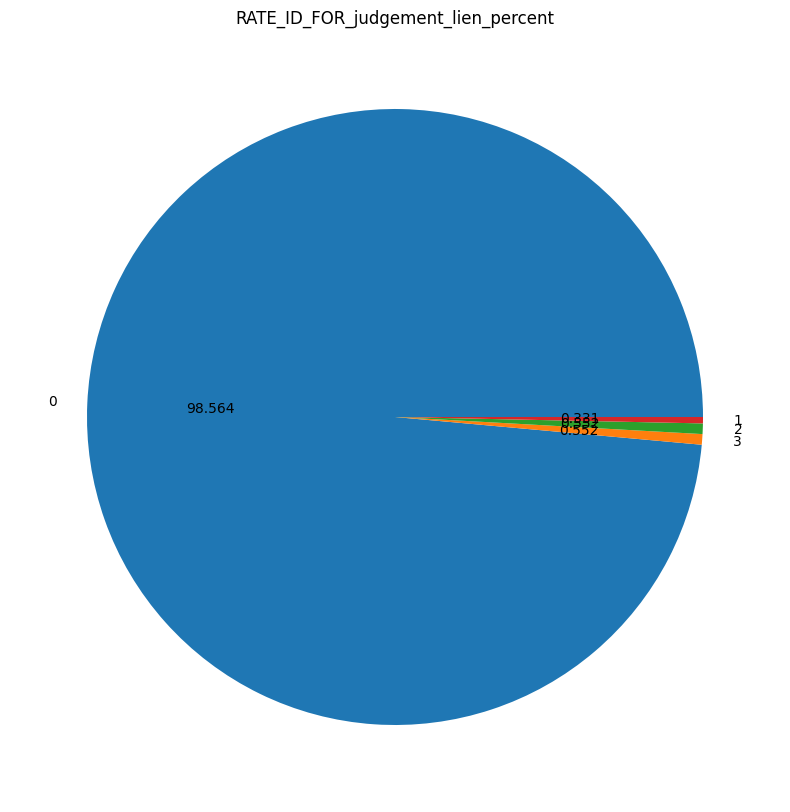

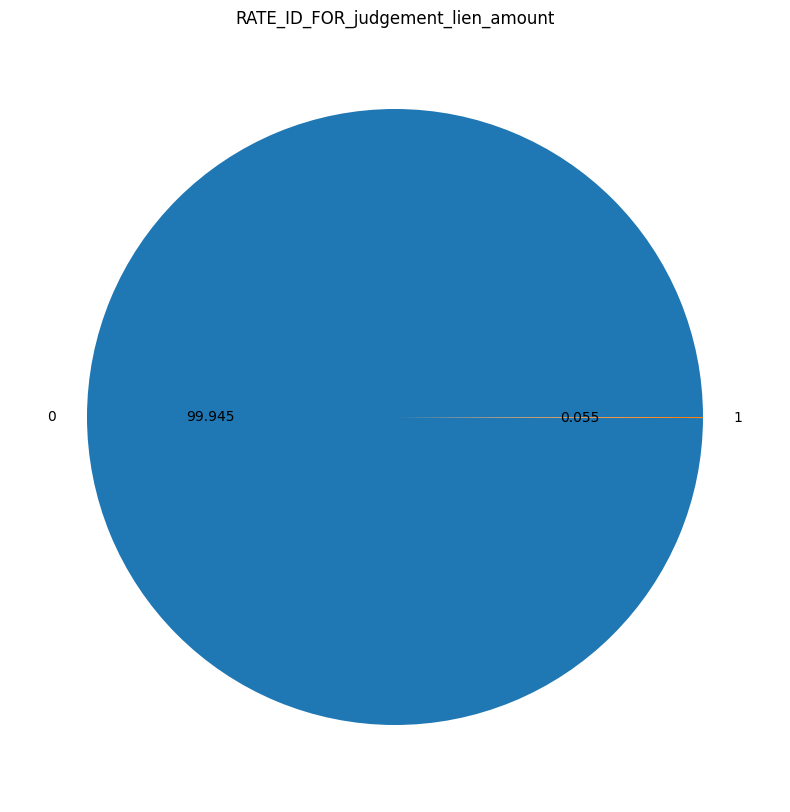

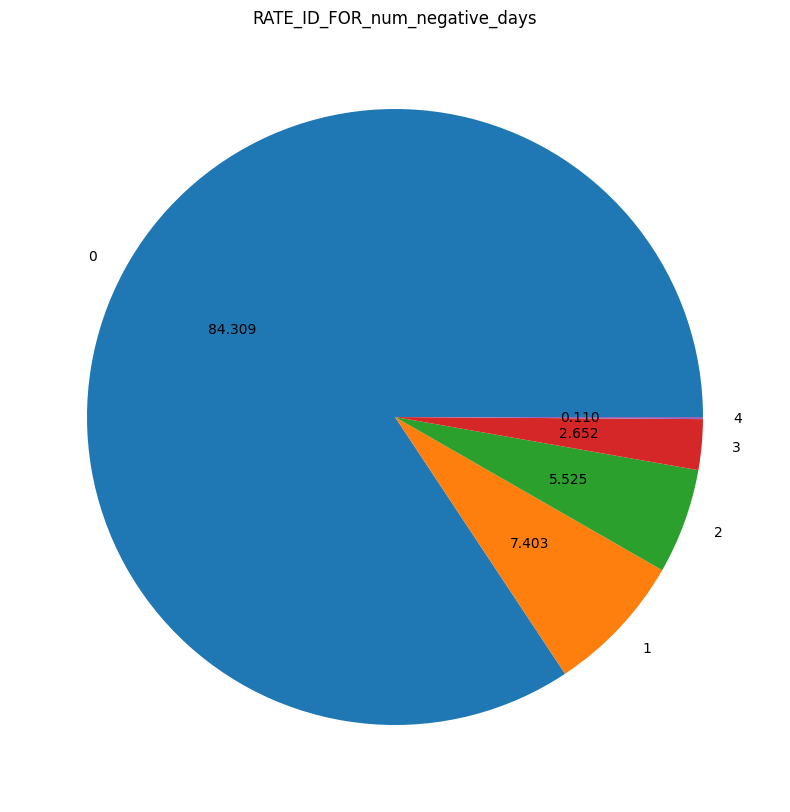

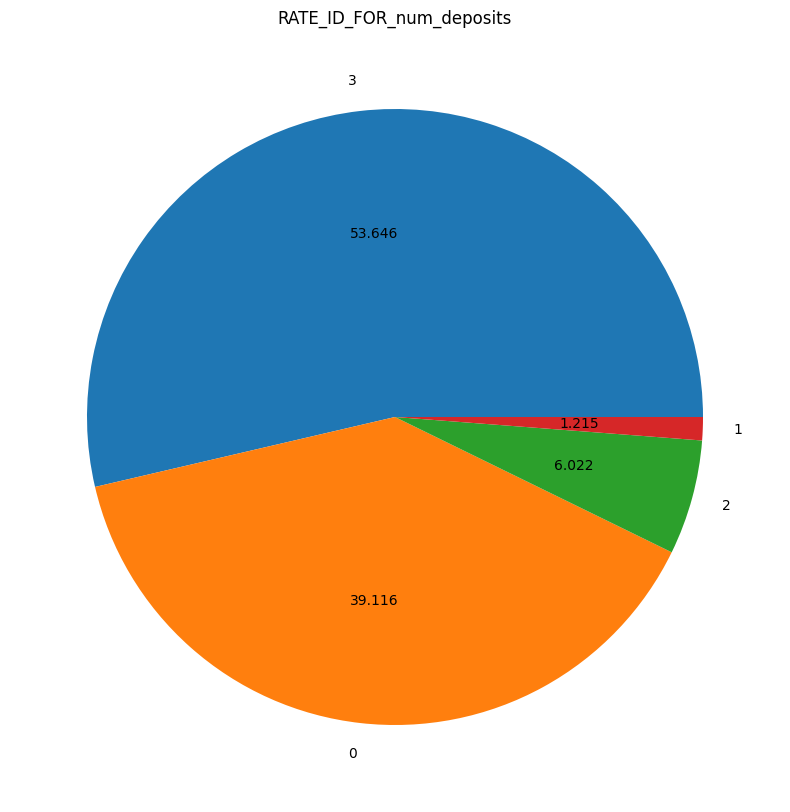

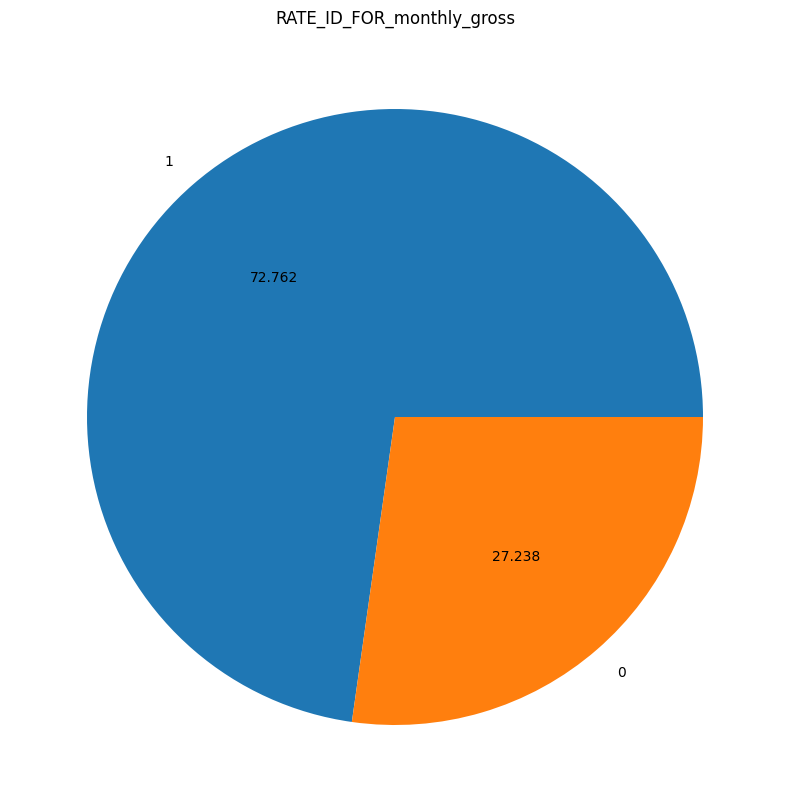

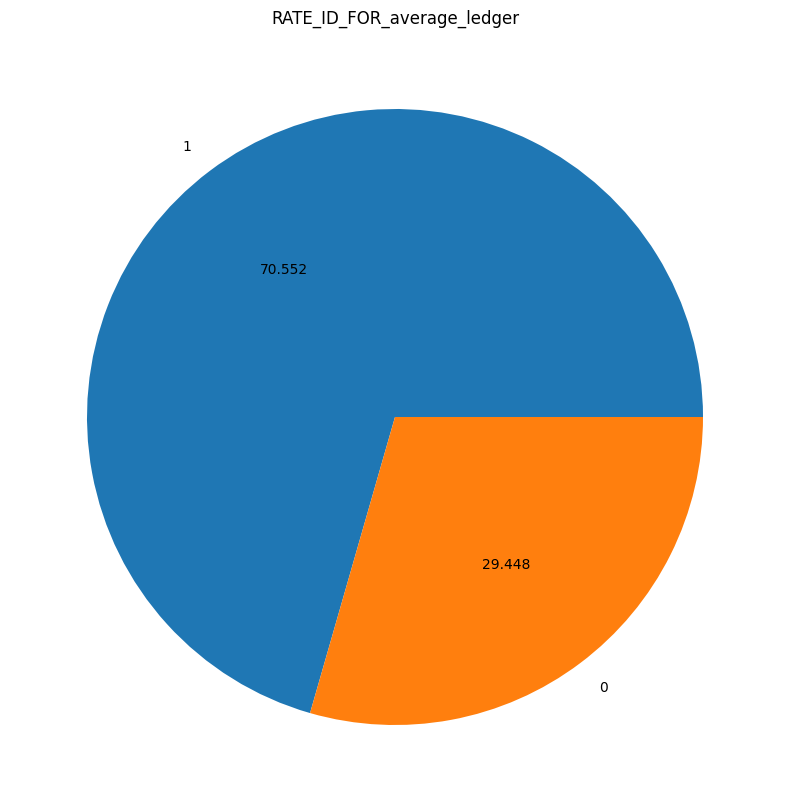

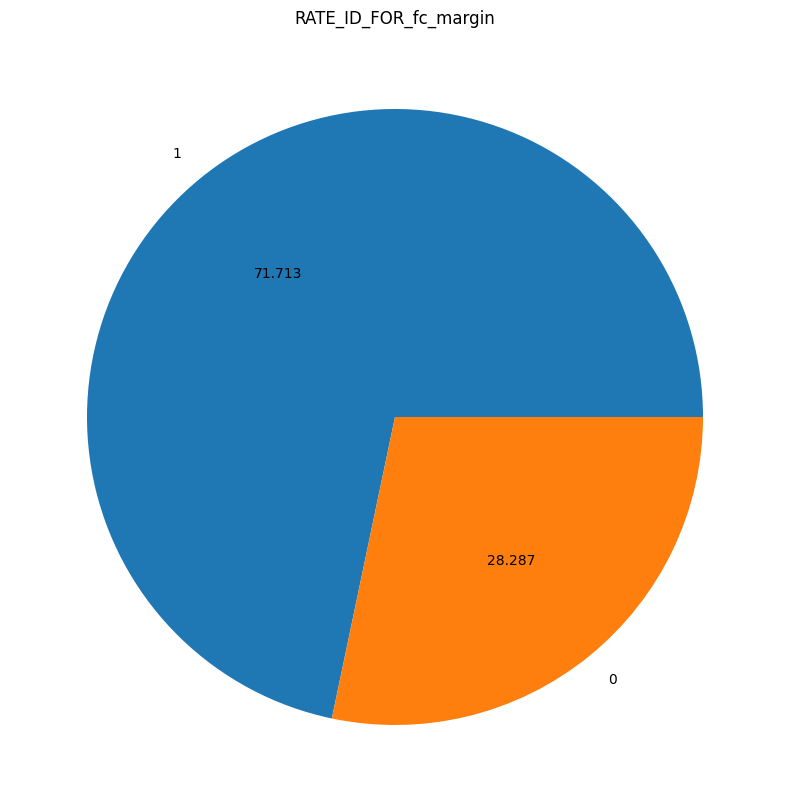

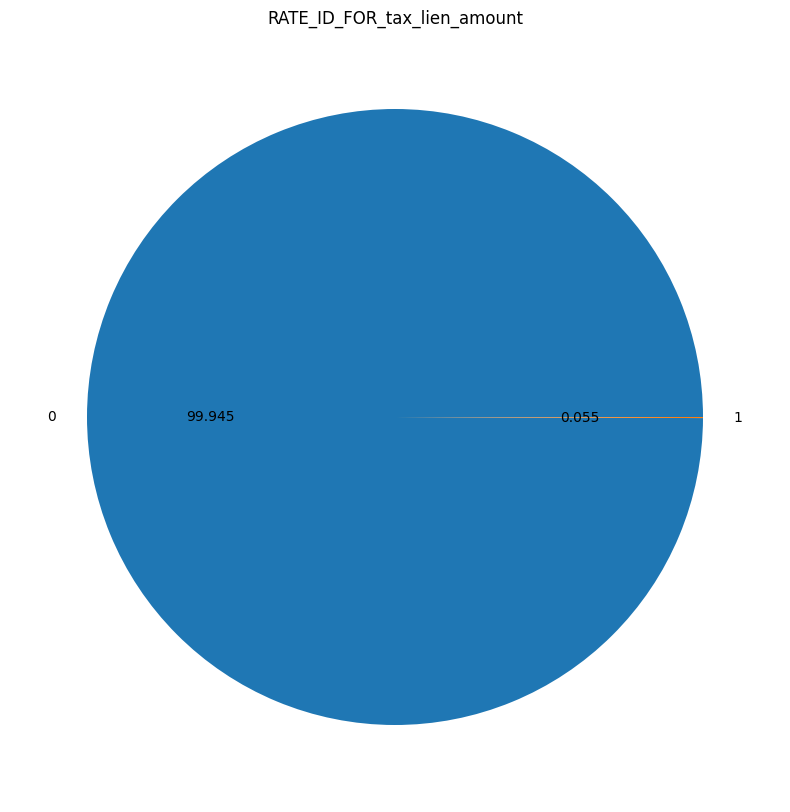

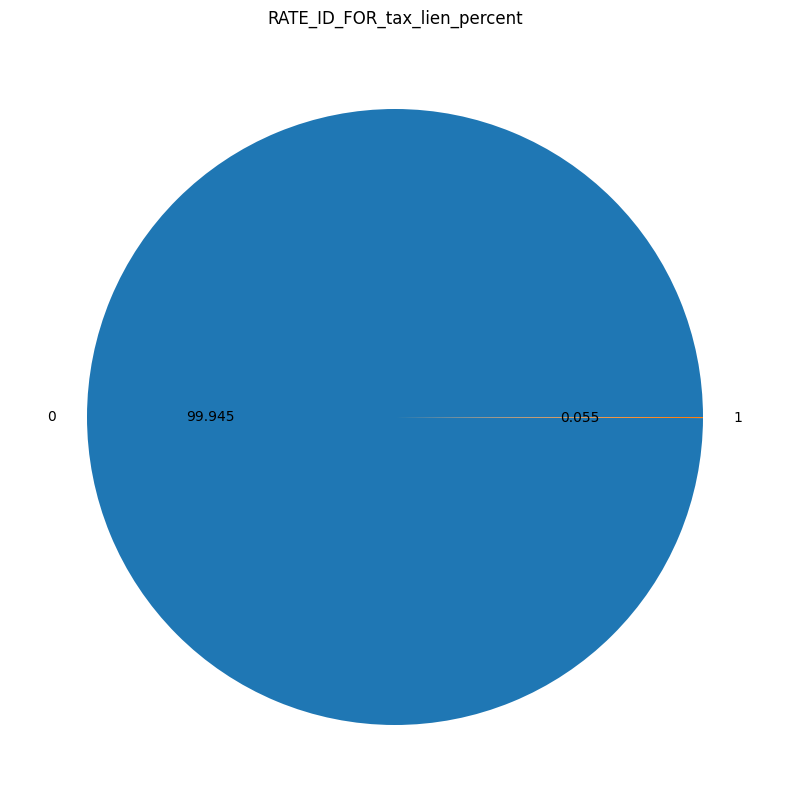

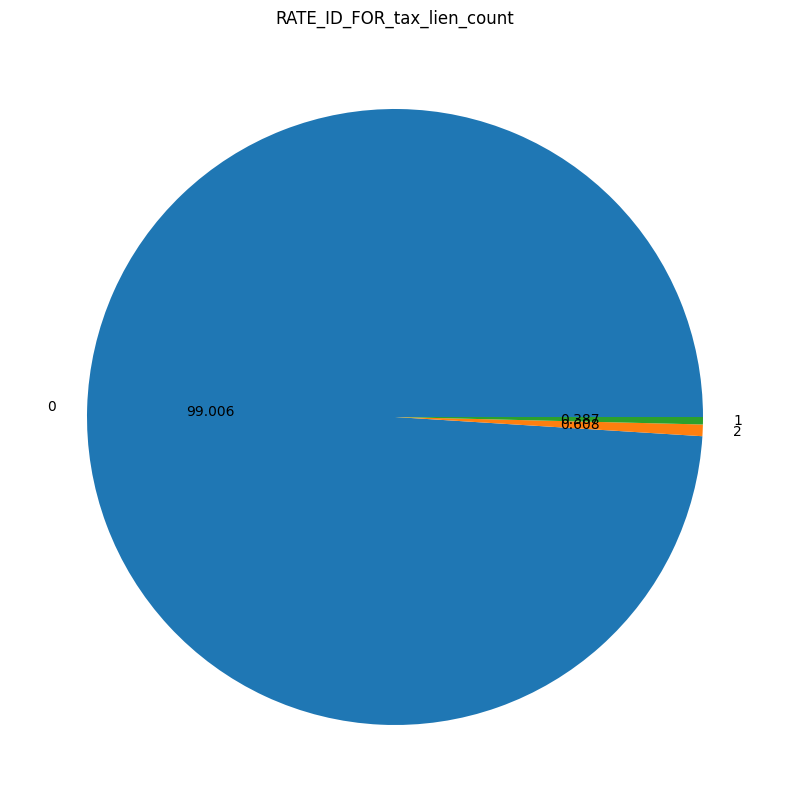

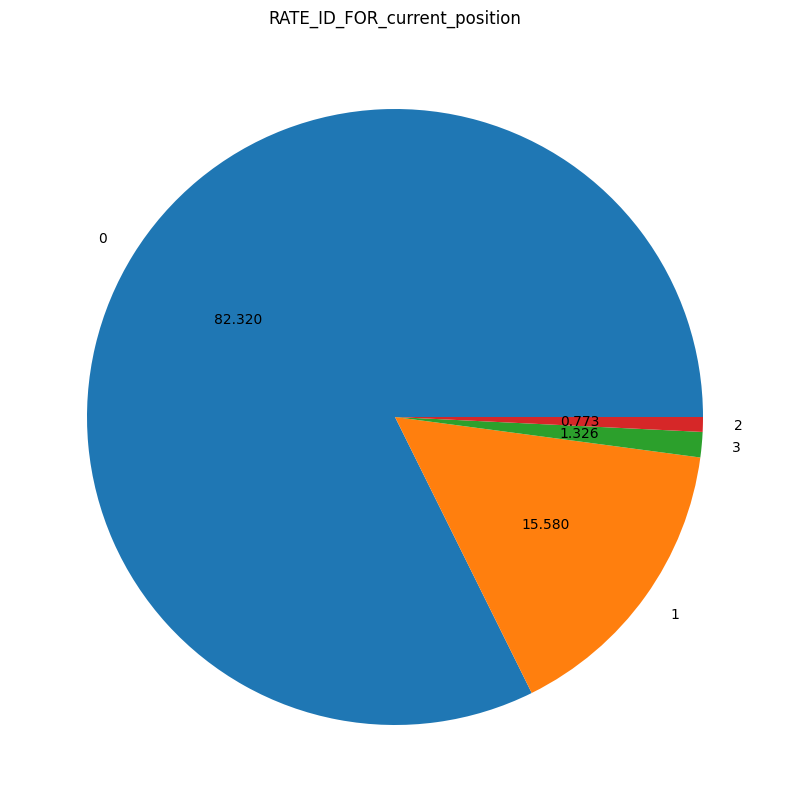

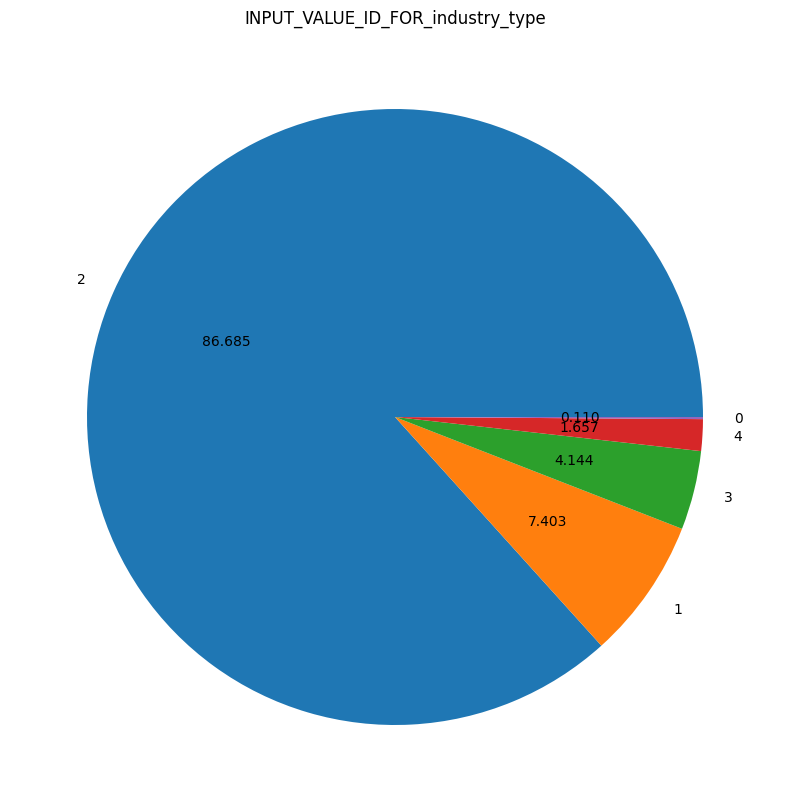

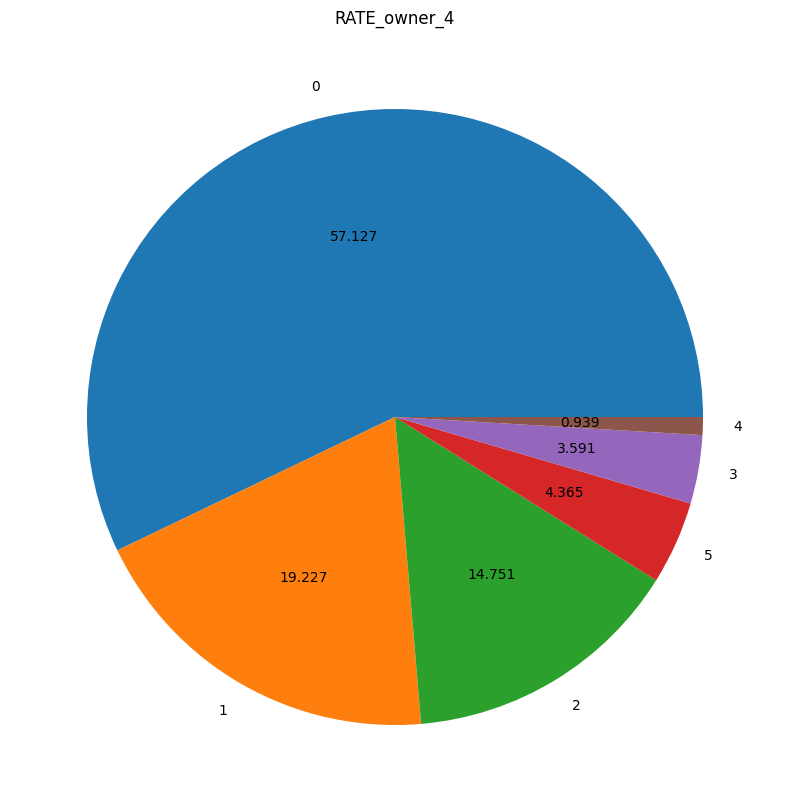

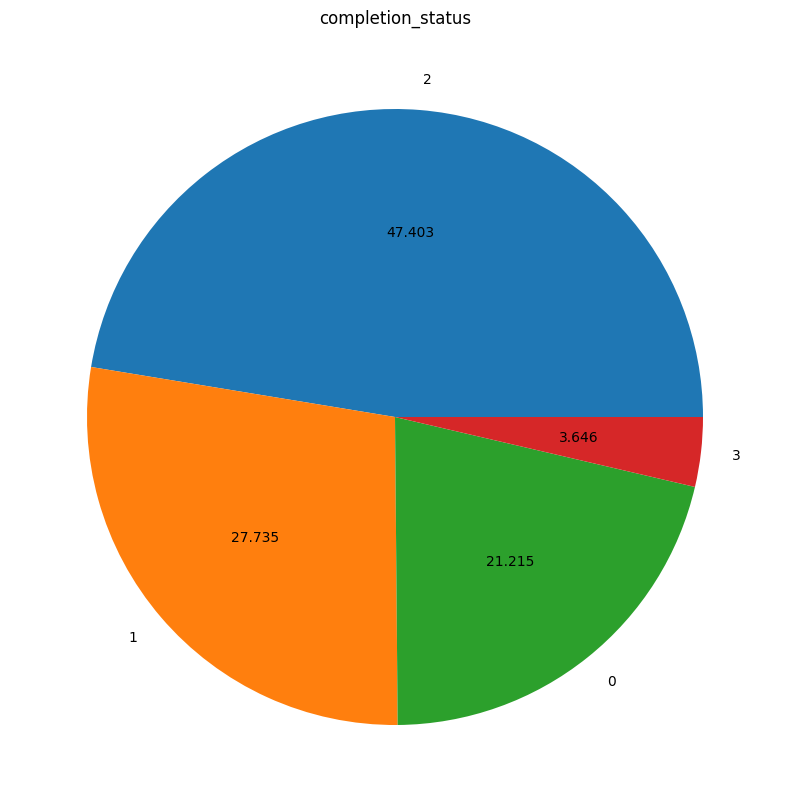

In [ ]:
cols = ['RATE_owner_1', 
            'RATE_ID_FOR_years_in_business', 
            'location','RATE_ID_FOR_location',
            'funded_last_30','RATE_ID_FOR_judgement_lien_percent',
            'RATE_ID_FOR_judgement_lien_amount',
            'RATE_ID_FOR_num_negative_days',
            'RATE_ID_FOR_num_deposits',
            'RATE_ID_FOR_monthly_gross',
            'RATE_ID_FOR_average_ledger',
            'RATE_ID_FOR_fc_margin',
            'RATE_ID_FOR_tax_lien_amount',
            'RATE_ID_FOR_tax_lien_percent',
            'RATE_ID_FOR_tax_lien_count',
            'RATE_ID_FOR_current_position',
            'INPUT_VALUE_ID_FOR_industry_type',
            'RATE_owner_4',
            'completion_status']
for col in cols:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=False,
            autopct='%.3f')
    plt.show()

In [ ]:
df.drop('RATE_ID_FOR_location', axis = 1,inplace =True)
df.drop('funded_last_30', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_judgement_lien_percent', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_judgement_lien_amount', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_tax_lien_amount', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_tax_lien_percent', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_tax_lien_count', axis = 1,inplace =True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   owner_1_score                             1810 non-null   float64
 2   RATE_owner_1                              1810 non-null   int64  
 3   CAP_AMOUNT_owner_1                        1810 non-null   float64
 4   PERCENT_OWN_owner_1                       1810 non-null   float64
 5   years_in_business                         1810 non-null   float64
 6   RATE_ID_FOR_years_in_business             1810 non-null   int64  
 7   fsr                                       1810 non-null   float64
 8   location                                  1810 non-null   int64  
 9   judgement_lien_percent                    1810 non-null   float64
 10  INPUT_VALUE_ID_FOR_judgement_lien_am

In [ ]:
for i in df.columns:
   
       print(i," = ",df[i].corr(df['completion_status']))

Unnamed: 0  =  -0.017454690079565578
owner_1_score  =  0.06230953320483407
RATE_owner_1  =  0.012071946530286775
CAP_AMOUNT_owner_1  =  0.01943582146068522
PERCENT_OWN_owner_1  =  -0.009192249894661095
years_in_business  =  -0.00045851722704791197
RATE_ID_FOR_years_in_business  =  -0.06113429564947146
fsr  =  0.0776302864312906
location  =  -0.04323705876116054
judgement_lien_percent  =  -0.0012433831900629767
INPUT_VALUE_ID_FOR_judgement_lien_amount  =  -0.0023497351454238656
INPUT_VALUE_ID_FOR_num_negative_days  =  -0.04392635940297159
RATE_ID_FOR_num_negative_days  =  -0.12627503305541465
INPUT_VALUE_ID_FOR_num_deposits  =  0.06636586843832043
RATE_ID_FOR_num_deposits  =  -0.025204164360451673
INPUT_VALUE_ID_FOR_monthly_gross  =  -0.08250809645075656
RATE_ID_FOR_monthly_gross  =  0.07035670333288079
INPUT_VALUE_ID_FOR_average_ledger  =  -0.061194821613371725
RATE_ID_FOR_average_ledger  =  0.01806222491714089
INPUT_VALUE_ID_FOR_fc_margin  =  -0.011641755744362584
RATE_ID_FOR_fc_margi

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #measures multy colinearity
vif = pd.DataFrame()
vif['Features'] =df.columns
df.astype(np.float64)
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,INPUT_VALUE_ID_FOR_tax_lien_amount,6633.87
10,INPUT_VALUE_ID_FOR_judgement_lien_amount,6191.87
22,INPUT_VALUE_ID_FOR_tax_lien_percent,5397.28
9,judgement_lien_percent,4956.79
26,INPUT_VALUE_ID_FOR_avg_net_deposits,674.76
15,INPUT_VALUE_ID_FOR_monthly_gross,670.35
3,CAP_AMOUNT_owner_1,229.25
30,CAP_AMOUNT_owner_4,222.14
31,PERCENT_OWN_owner_4,34.27
4,PERCENT_OWN_owner_1,29.59


we will test for multicollinearity with Variance Inflating factor (VIF)

If the value of VIF is –

1 => not correlated. Multicollinearity doesn’t exist.

Between 1 and 5 => moderately correlated. Low multicollinearity exists.

Greater than 5 => Highly correlated. High Multicollinearity exists.

In [ ]:
cols=df[['INPUT_VALUE_ID_FOR_tax_lien_amount',
                       'INPUT_VALUE_ID_FOR_judgement_lien_amount', 
                       'INPUT_VALUE_ID_FOR_tax_lien_percent',
                       'judgement_lien_percent']]
for i in cols:
   print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1805    0.0
1806    0.0
1807    0.0
1808    0.0
1809    0.0
Name: INPUT_VALUE_ID_FOR_tax_lien_amount, Length: 1810, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1805    0.0
1806    0.0
1807    0.0
1808    0.0
1809    0.0
Name: INPUT_VALUE_ID_FOR_judgement_lien_amount, Length: 1810, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1805    0.0
1806    0.0
1807    0.0
1808    0.0
1809    0.0
Name: INPUT_VALUE_ID_FOR_tax_lien_percent, Length: 1810, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1805    0.0
1806    0.0
1807    0.0
1808    0.0
1809    0.0
Name: judgement_lien_percent, Length: 1810, dtype: float64>


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
selected_columns = df[['INPUT_VALUE_ID_FOR_tax_lien_amount',
                       'INPUT_VALUE_ID_FOR_judgement_lien_amount', 
                       'INPUT_VALUE_ID_FOR_tax_lien_percent',
                       'judgement_lien_percent']]
scaler = StandardScaler()
std = scaler.fit_transform(selected_columns)
pca = PCA(n_components=1)
pca.fit(std)
X_pca = pca.transform(std)

with open('PCA', 'wb') as f:
    pickle.dump(pca, f)
    


In [ ]:
with open('scaler', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
X_pca

array([[-0.06620379],
       [-0.06620379],
       [-0.06620379],
       ...,
       [-0.06620379],
       [-0.06620379],
       [-0.06620379]])

In [ ]:
df.drop('INPUT_VALUE_ID_FOR_tax_lien_amount', axis = 1,inplace =True)
df.drop('INPUT_VALUE_ID_FOR_judgement_lien_amount', axis = 1,inplace =True)
df.drop('INPUT_VALUE_ID_FOR_tax_lien_percent', axis = 1,inplace =True)
df.drop('judgement_lien_percent', axis = 1,inplace =True)
df['PCA']=X_pca
df['PCA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1810 entries, 0 to 1809
Series name: PCA
Non-Null Count  Dtype  
--------------  -----  
1810 non-null   float64
dtypes: float64(1)
memory usage: 14.3 KB


<Axes: xlabel='PCA', ylabel='Density'>

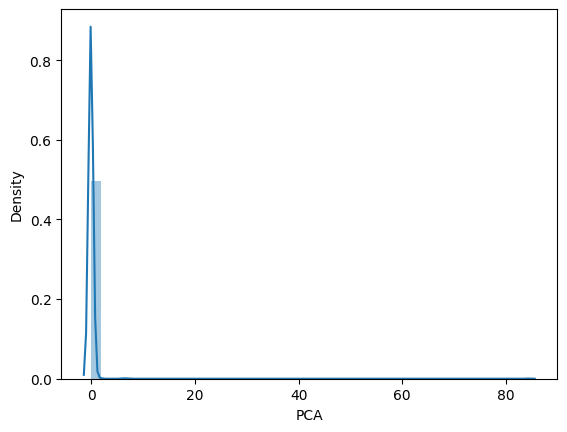

In [ ]:
sns.distplot(df['PCA'])


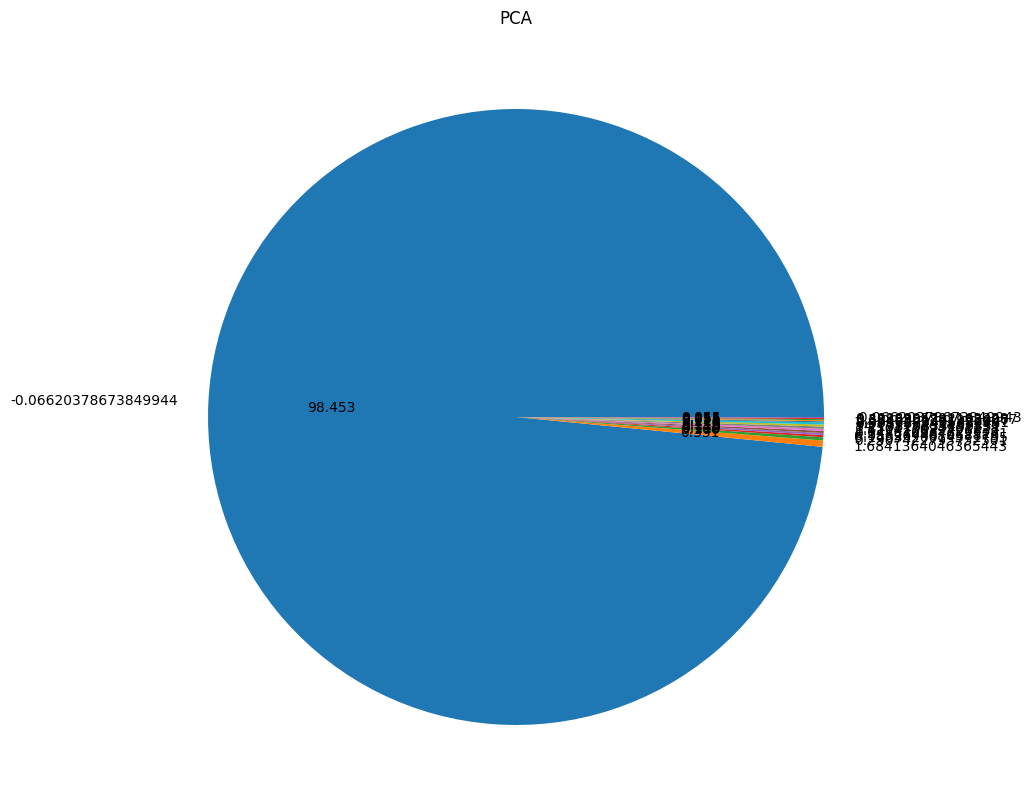

In [ ]:
cols = ['PCA']
for col in cols:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=False,
            autopct='%.3f')
    plt.show()

In [ ]:
df.head()

,Unnamed: 0,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,INPUT_VALUE_ID_FOR_num_negative_days,...,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status,PCA
0,900,606.0,0,150000.0,100.0,2.07,0,52.666667,1,0.0,...,0,0.00,2,606.0,0,150000.0,100.0,4642.0,2,-0.066204
1,329,703.0,0,150000.0,100.0,26.57,0,73.000000,3,0.0,...,0,107027.25,2,703.0,0,150000.0,100.0,1362.0,1,-0.066204
2,1035,692.0,0,150000.0,100.0,42.10,0,19.000000,1,0.0,...,0,0.00,2,692.0,0,150000.0,100.0,6485.0,0,-0.066204
3,1670,684.0,0,150000.0,100.0,5.53,0,59.000000,1,0.0,...,0,0.00,2,684.0,0,150000.0,100.0,6035.0,3,-0.066204
4,1726,625.0,0,150000.0,100.0,1.65,1,24.000000,1,0.0,...,0,0.00,2,625.0,0,150000.0,100.0,5299.0,1,-0.066204


In [ ]:
from sklearn.feature_selection import chi2 

In [ ]:
dfs=df[['RATE_owner_1', 
            'RATE_ID_FOR_years_in_business', 
            'location',
            'RATE_ID_FOR_num_negative_days',
            'RATE_ID_FOR_num_deposits',
            'RATE_ID_FOR_monthly_gross',
            'RATE_ID_FOR_average_ledger',
            'RATE_ID_FOR_fc_margin',
            'RATE_ID_FOR_current_position',
            'INPUT_VALUE_ID_FOR_industry_type',
            'RATE_owner_4',
            'completion_status']]

In [ ]:
x_temp=dfs.drop("completion_status",axis=1)
y_temp=dfs['completion_status']

In [ ]:
chi_scores=chi2(x_temp,y_temp)

In [ ]:
chi_scores

(array([ 9.49155853, 24.87417099,  1.70790117, 99.01706013,  7.67492863,
         6.52317069,  0.49498337,  7.47265519,  1.2178058 ,  0.84552415,
        26.4189847 ]),
 array([2.34213333e-02, 1.64046828e-05, 6.35178615e-01, 2.52833798e-21,
        5.32301070e-02, 8.87531745e-02, 9.19992152e-01, 5.82652356e-02,
        7.48736989e-01, 8.38550085e-01, 7.79258650e-06]))

<Axes: >

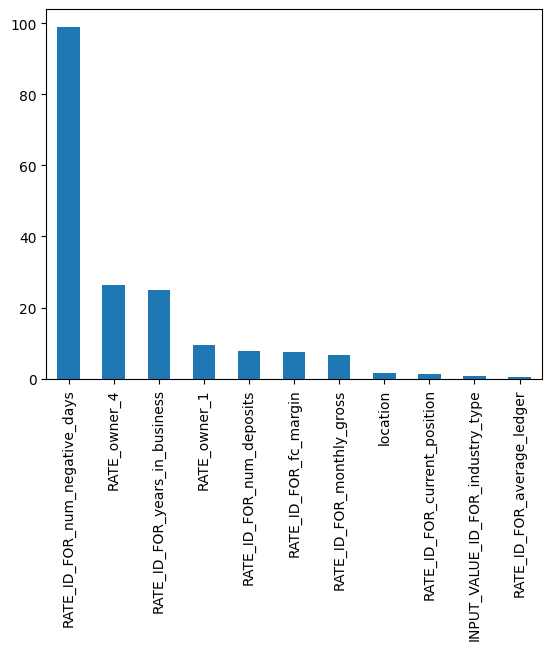

In [ ]:
#the higher the chi value the more important the feature
chi_values=pd.Series(chi_scores[0],index=x_temp.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

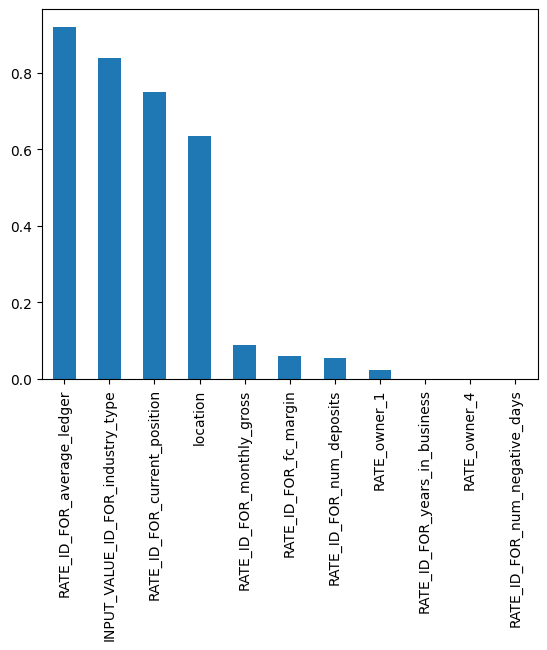

In [ ]:
#the lower the p value the more important the feature
p_values=pd.Series(chi_scores[1],index=x_temp.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [ ]:
df.drop('RATE_ID_FOR_average_ledger', axis = 1,inplace =True)
df.drop('INPUT_VALUE_ID_FOR_industry_type', axis = 1,inplace =True)
df.drop('RATE_ID_FOR_current_position', axis = 1,inplace =True)
df.drop('location', axis = 1,inplace =True)

In [ ]:
df.shape

(1810, 27)

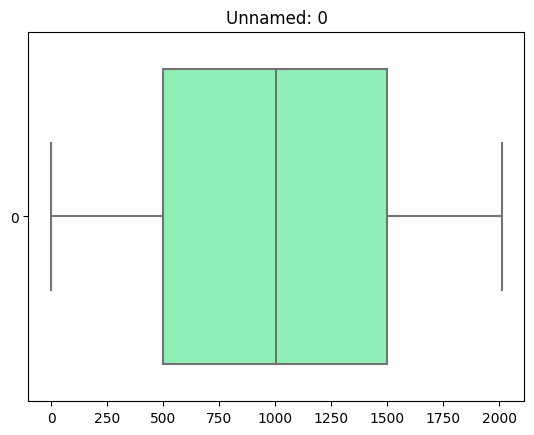

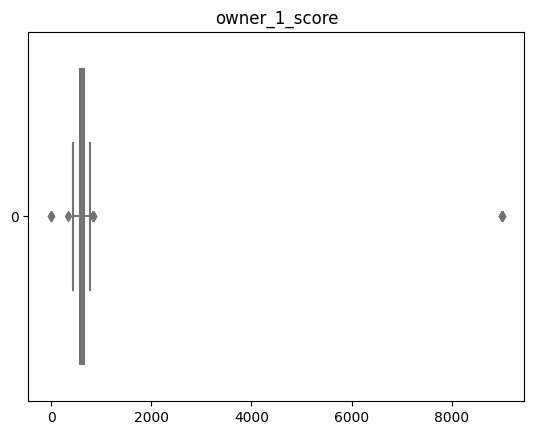

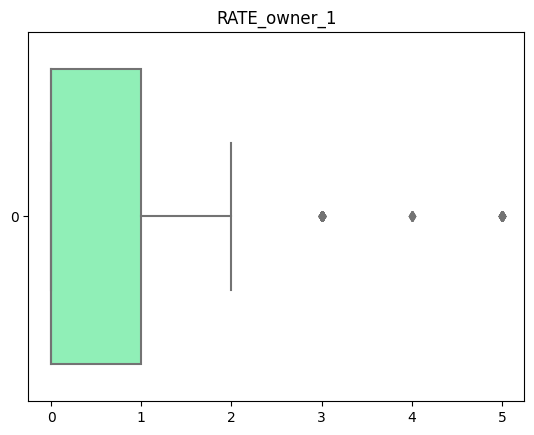

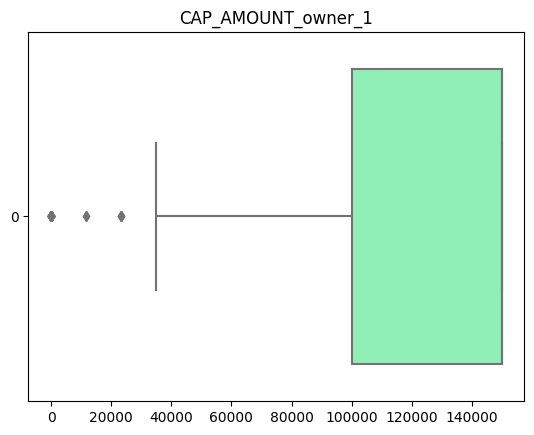

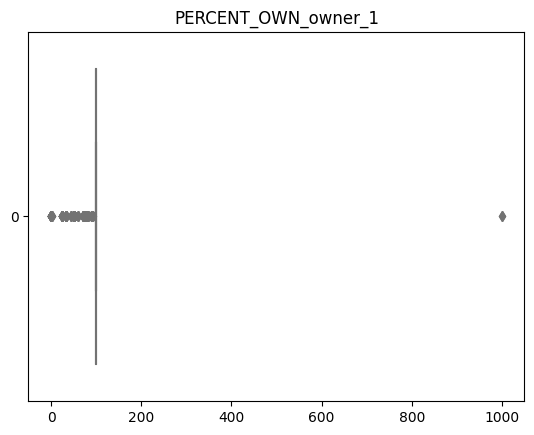

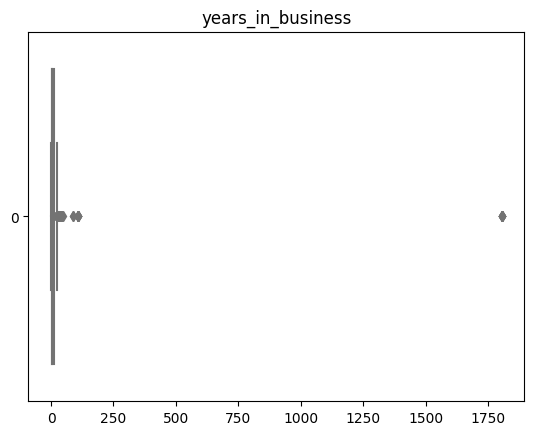

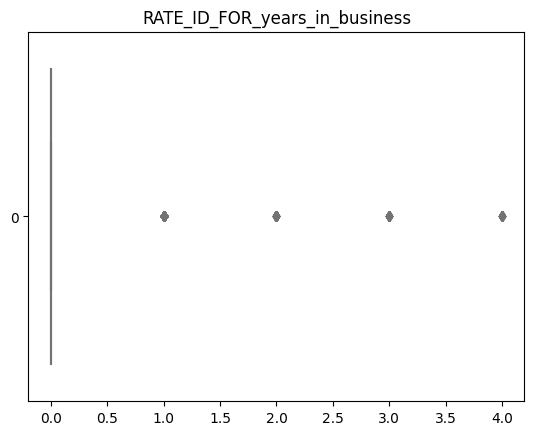

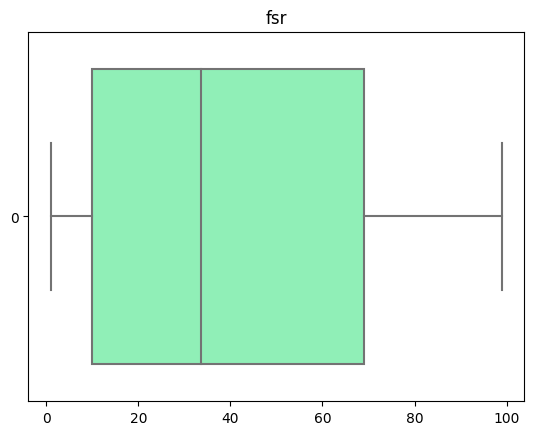

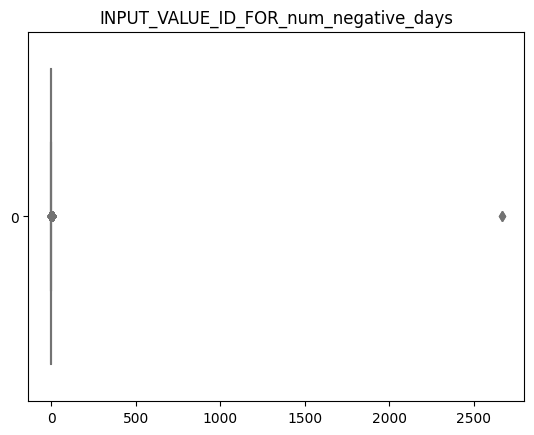

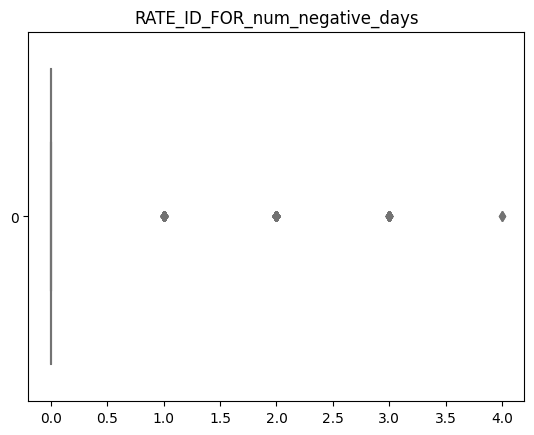

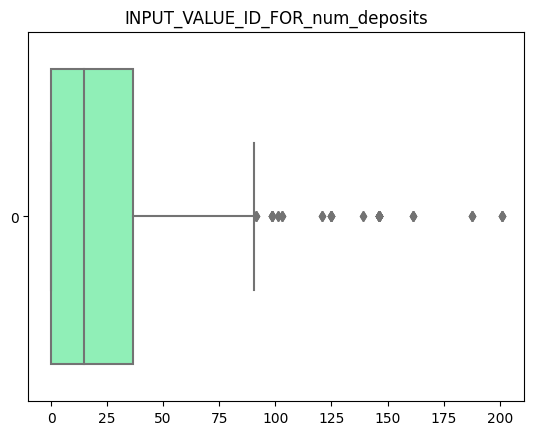

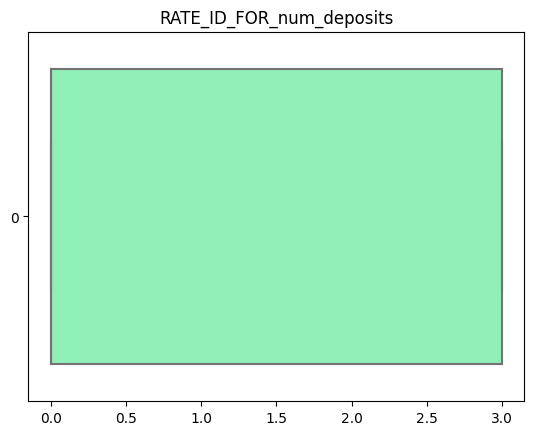

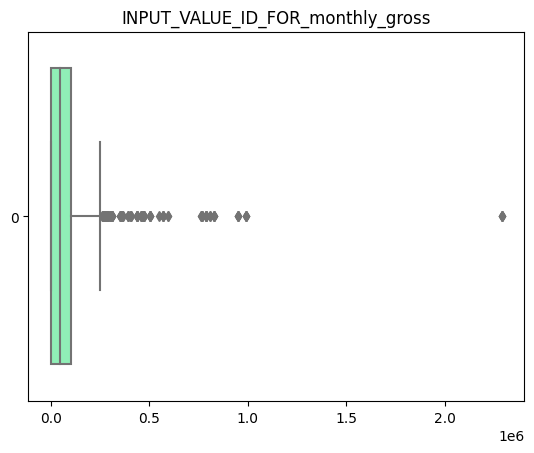

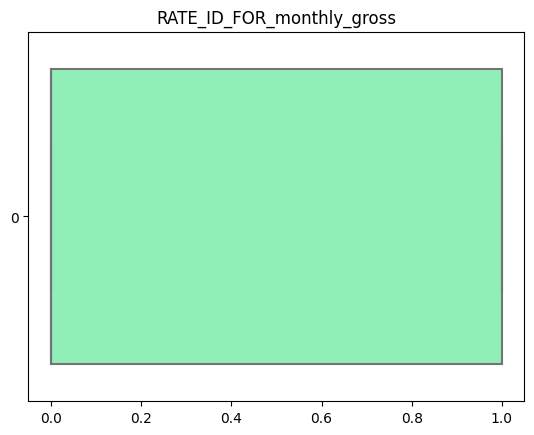

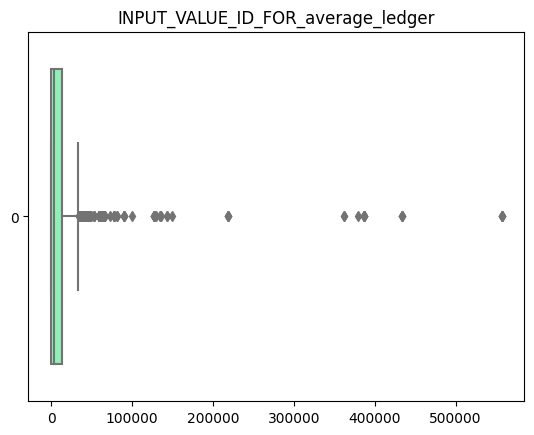

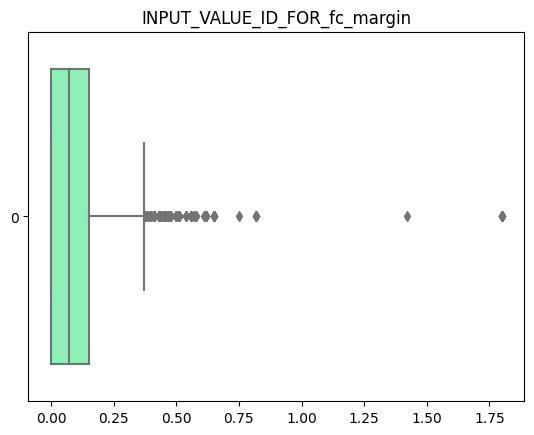

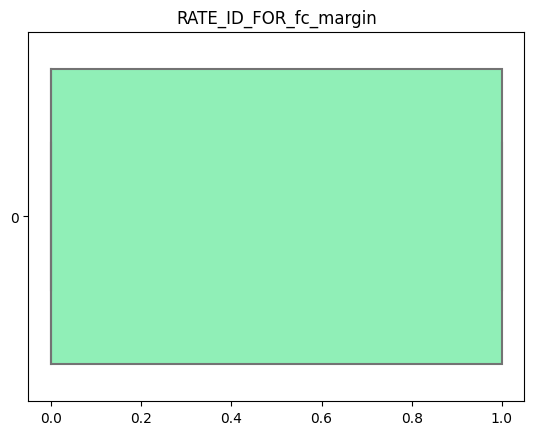

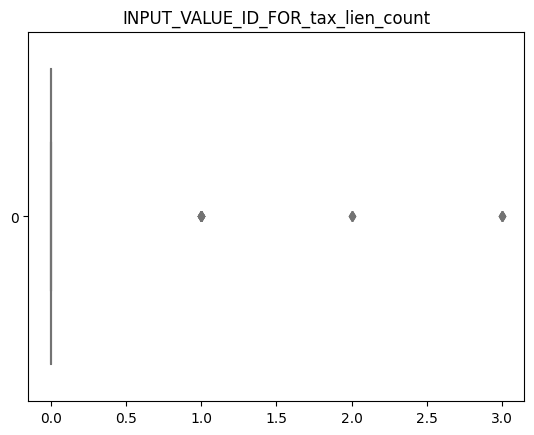

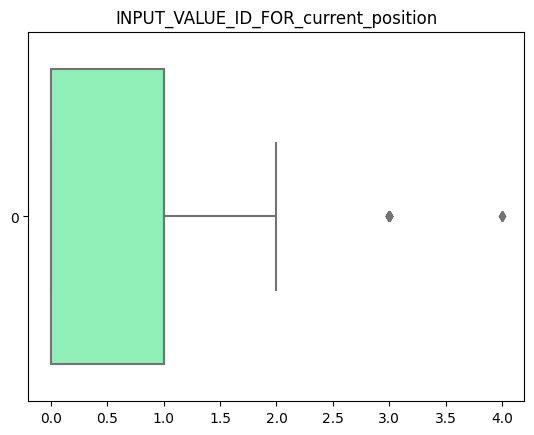

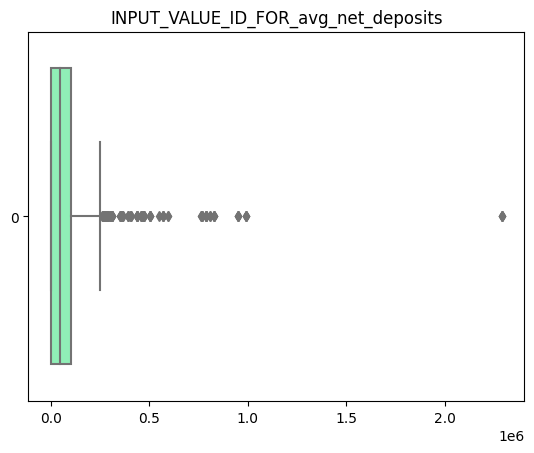

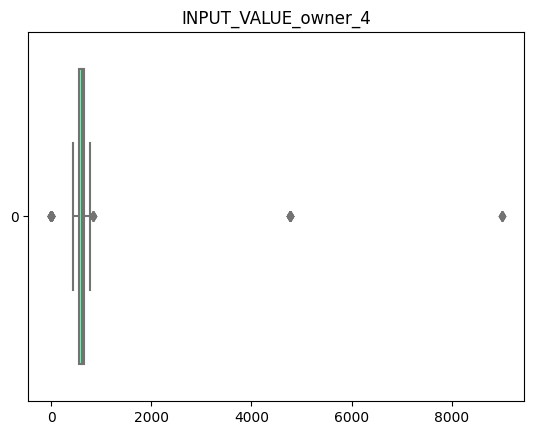

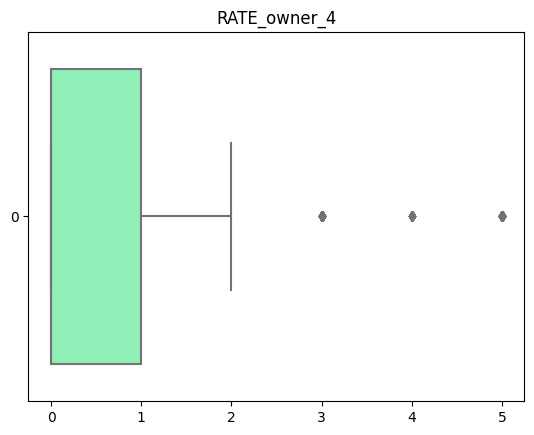

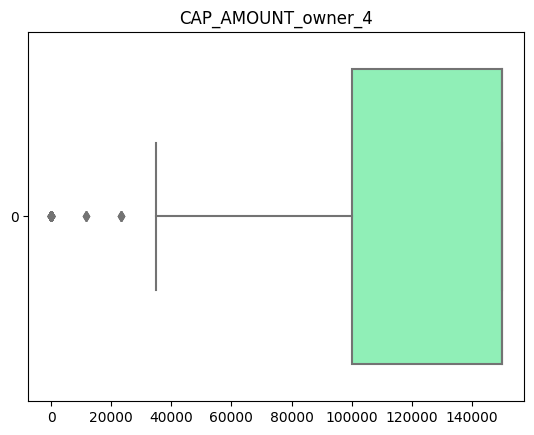

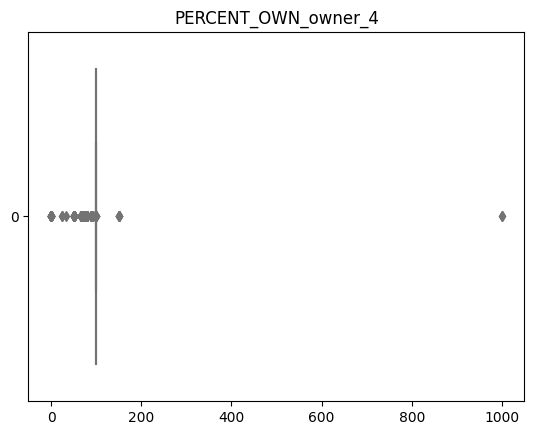

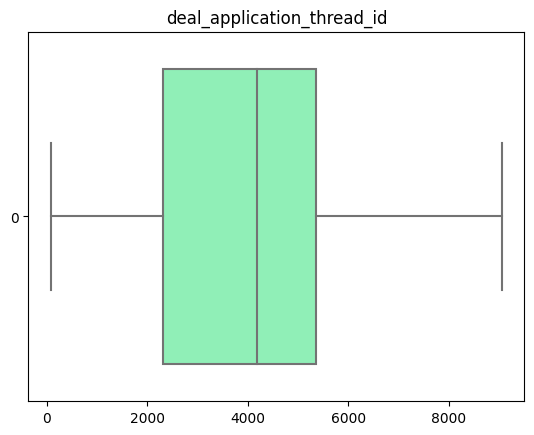

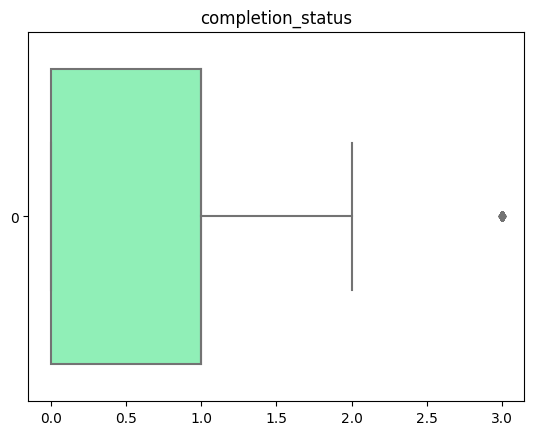

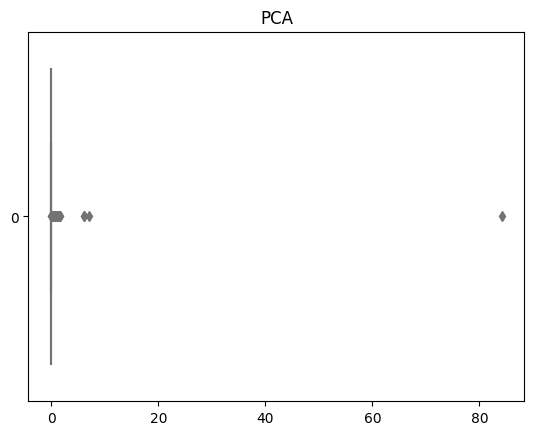

In [ ]:
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df[i],palette='rainbow',orient='h')
    plt.title(i)

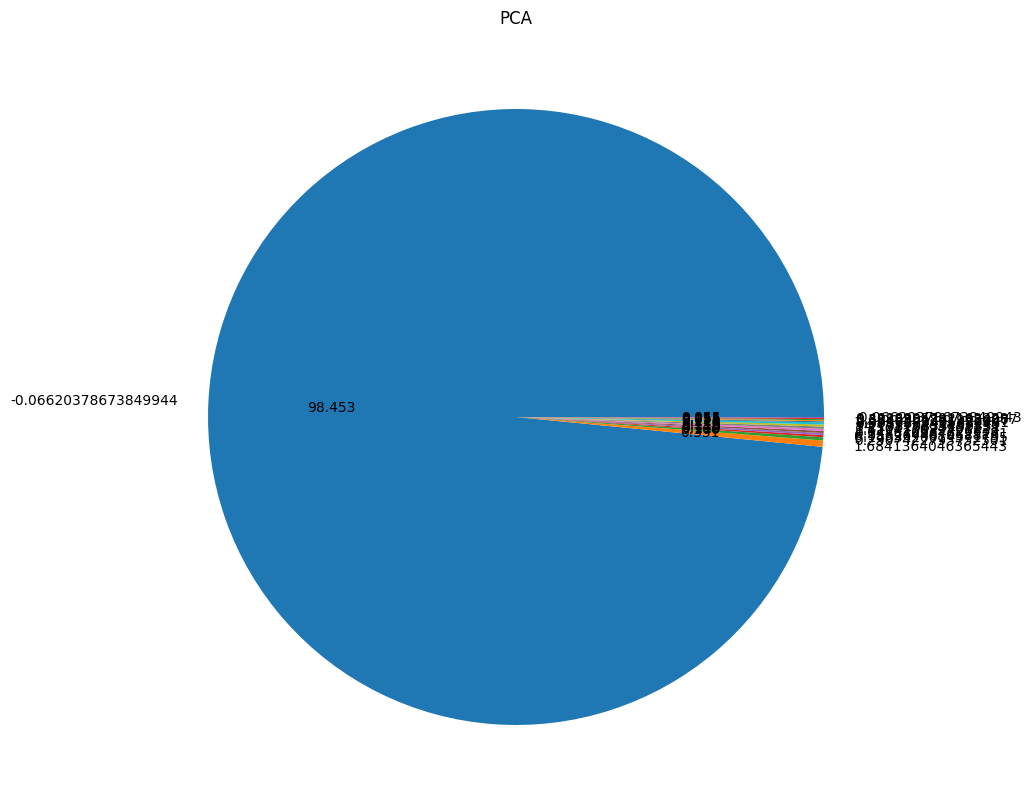

In [ ]:
#years_in_business
#PERCENT_OWN_owner_1
#INPUT_VALUE_ID_FOR_num_negative_days
#INPUT_VALUE_ID_FOR_num_deposits
#INPUT_VALUE_ID_FOR_monthly_gross
#INPUT_VALUE_ID_FOR_average_ledger
#INPUT_VALUE_ID_FOR_fc_margin
#drop   INPUT_VALUE_ID_FOR_tax_lien_count
#INPUT_VALUE_ID_FOR_current_position
#INPUT_VALUE_ID_FOR_avg_net_deposits
#INPUT_VALUE_owner_4
cols = ['PCA']
for col in cols:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=False,
            autopct='%.3f')
    plt.show()

In [ ]:
df.drop(['INPUT_VALUE_ID_FOR_tax_lien_count'], axis='columns', inplace=True)

In [ ]:
#years_in_business
#PERCENT_OWN_owner_1
#INPUT_VALUE_ID_FOR_num_negative_days
#INPUT_VALUE_ID_FOR_num_deposits
#INPUT_VALUE_ID_FOR_monthly_gross
#INPUT_VALUE_ID_FOR_average_ledger
#INPUT_VALUE_ID_FOR_fc_margin
#drop   INPUT_VALUE_ID_FOR_tax_lien_count
#INPUT_VALUE_ID_FOR_current_position
#INPUT_VALUE_ID_FOR_avg_net_deposits
#INPUT_VALUE_own

from scipy import stats
cols = ['years_in_business', 'PERCENT_OWN_owner_1',
        'INPUT_VALUE_ID_FOR_num_negative_days',
        'INPUT_VALUE_ID_FOR_num_deposits',
        'INPUT_VALUE_ID_FOR_monthly_gross',
        'INPUT_VALUE_ID_FOR_average_ledger',
        'INPUT_VALUE_ID_FOR_fc_margin',
        'INPUT_VALUE_ID_FOR_current_position',
        'INPUT_VALUE_ID_FOR_avg_net_deposits',
        'INPUT_VALUE_owner_4'
        ]

# Calculate Z-scores for each value in the specified columns
z_scores = stats.zscore(df[cols])

# Remove rows where the absolute Z-score is greater than 3 in any of the specified columns
df_clean = df[(z_scores < 3).all(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1809
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1679 non-null   int64  
 1   owner_1_score                         1679 non-null   float64
 2   RATE_owner_1                          1679 non-null   int64  
 3   CAP_AMOUNT_owner_1                    1679 non-null   float64
 4   PERCENT_OWN_owner_1                   1679 non-null   float64
 5   years_in_business                     1679 non-null   float64
 6   RATE_ID_FOR_years_in_business         1679 non-null   int64  
 7   fsr                                   1679 non-null   float64
 8   INPUT_VALUE_ID_FOR_num_negative_days  1679 non-null   float64
 9   RATE_ID_FOR_num_negative_days         1679 non-null   int64  
 10  INPUT_VALUE_ID_FOR_num_deposits       1679 non-null   float64
 11  RATE_ID_FOR_num_d

In [ ]:
df['years_in_business']=df_clean['years_in_business']
df['PERCENT_OWN_owner_1']=df_clean['PERCENT_OWN_owner_1']
df['INPUT_VALUE_ID_FOR_num_negative_days']=df_clean['INPUT_VALUE_ID_FOR_num_negative_days']
df['INPUT_VALUE_ID_FOR_num_deposits']=df_clean['INPUT_VALUE_ID_FOR_num_deposits']
df['INPUT_VALUE_ID_FOR_monthly_gross']=df_clean['INPUT_VALUE_ID_FOR_monthly_gross']
df['INPUT_VALUE_ID_FOR_average_ledger']=df_clean['INPUT_VALUE_ID_FOR_average_ledger']
df['INPUT_VALUE_ID_FOR_fc_margin']=df_clean['INPUT_VALUE_ID_FOR_fc_margin']
df['INPUT_VALUE_ID_FOR_current_position']=df_clean['INPUT_VALUE_ID_FOR_current_position']
df['INPUT_VALUE_ID_FOR_avg_net_deposits']=df_clean['INPUT_VALUE_ID_FOR_avg_net_deposits']
df['INPUT_VALUE_owner_4']=df_clean['INPUT_VALUE_owner_4']


In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit(df)
with open('KNN2', 'wb') as f:
    pickle.dump(imputed_data, f)
imputed_data = imputer.transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df = imputed_df.astype(df.dtypes.to_dict())
df=imputed_df

# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=3)
# imputed_data = imputer.fit(df)

# with open('KNN1', 'wb') as f:
#     pickle.dump(imputed_data, f)
    
# imputed_data = imputer.transform(df)
# imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
# imputed_df = imputed_df.astype(df.dtypes.to_dict())
# df=imputed_df

In [ ]:
 df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1810 non-null   int64  
 1   owner_1_score                         1810 non-null   float64
 2   RATE_owner_1                          1810 non-null   int64  
 3   CAP_AMOUNT_owner_1                    1810 non-null   float64
 4   PERCENT_OWN_owner_1                   1810 non-null   float64
 5   years_in_business                     1810 non-null   float64
 6   RATE_ID_FOR_years_in_business         1810 non-null   int64  
 7   fsr                                   1810 non-null   float64
 8   INPUT_VALUE_ID_FOR_num_negative_days  1810 non-null   float64
 9   RATE_ID_FOR_num_negative_days         1810 non-null   int64  
 10  INPUT_VALUE_ID_FOR_num_deposits       1810 non-null   float64
 11  RATE_ID_FOR_num_d

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['completion_status'],axis=1)
y=df['completion_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =  101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
with open('min_max', 'wb') as f:
    pickle.dump(scaler, f)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state =83 ,max_iter=3000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=83)

In [ ]:
y_pred_2 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print (cm)

[[ 36  94   1   0]
 [ 20 179   1   0]
 [  6  80  17   0]
 [  2  17   0   0]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_2)
print(cr)

              precision    recall  f1-score   support

           0       0.56      0.27      0.37       131
           1       0.48      0.90      0.63       200
           2       0.89      0.17      0.28       103
           3       0.00      0.00      0.00        19

    accuracy                           0.51       453
   macro avg       0.49      0.33      0.32       453
weighted avg       0.58      0.51      0.45       453



In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C=150, kernel='poly', degree= 4)
svc_model.fit(X_train, y_train)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
y_pred = svc_model.predict(X_test)

# Generate a classification report for the true and predicted labels
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

0.9049373618275608
0.7682119205298014
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       131
           1       0.76      0.80      0.78       200
           2       0.81      0.71      0.76       103
           3       0.87      0.68      0.76        19

    accuracy                           0.77       453
   macro avg       0.79      0.74      0.77       453
weighted avg       0.77      0.77      0.77       453



In [ ]:
 from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid'],'degree': [1,2,3,4,5,6]}
# grid=GridSearchCV(SVC(),param_grid)
# grid.fit(X_train,y_train)

In [ ]:
# print(grid.best_params_)
# print('training score',grid.score(X_train,y_train))
# print('testing score',grid.score(X_test,y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtclf = DecisionTreeClassifier(max_depth=3, criterion='gini',
                               random_state=100)
clf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=60,
                            learning_rate=0.8,
                            algorithm='SAMME.R',
                            random_state=100)

clf.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_test,y_test)*100))


Model accuracy score: 73.0287
Model accuracy score: 67.3289


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R'],
#     'base_estimator__max_depth': [1, 2, 3],
#     'base_estimator__min_samples_split': [2, 4, 6]
# }

# grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
# grid.fit(X_train,y_train)

In [ ]:
# print(grid.best_params_)
# print('training score',grid.score(X_train,y_train))
# print('testing score',grid.score(X_test,y_test))

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(max_depth=4, subsample=1, n_estimators=50, min_child_weight=1, random_state=5)
XGB.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_test,y_test)*100))

Model accuracy score: 99.5578
Model accuracy score: 94.2605


In [ ]:
y_pred_2 = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print (cm)

[[119   9   3   0]
 [  3 194   3   0]
 [  0   6  97   0]
 [  1   1   0  17]]


[TP1, E12, E13, E14],

 [E21, TP2, E23, E24],

 [E31, E32, TP3, E34],

 [E41, E42, E43, TP4]

 TP1 represents the number of true positives for class 1 (i.e., the number of instances of class 1 that were correctly classified as class 1).

TP2 represents the number of true positives for class 2.

TP3 represents the number of true positives for class 3.

TP4 represents the number of true positives for class 4.

E12 represents the number of instances of class 1 that were misclassified as class 2.

E13 represents the number of instances of class 1 that were misclassified as class 3.

E14 represents the number of instances of class 1 that were misclassified as class 4.

E21 represents the number of instances of class 2 that were misclassified as class 1.

E23 represents the number of instances of class 2 that were misclassified as class 3.

E24 represents the number of instances of class 2 that were misclassified as class 4.

E31 represents the number of instances of class 3 that were misclassified as class 1.

E32 represents the number of instances of class 3 that were misclassified as class 2.

E34 represents the number of instances of class 3 that were misclassified as class 4.

E41 represents the number of instances of class 4 that were misclassified as class 1.

E42 represents the number of instances of class 4 that were misclassified as class 2.

E43 represents the number of instances of class 4 that were misclassified as class 3.


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 6, 9],
#     'min_child_weight': [1, 2, 3]
# }

# grid = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=5)
# grid.fit(X_train,y_train)

In [ ]:
# print(grid.best_params_)
# print('training score',grid.score(X_train,y_train))
# print('testing score',grid.score(X_test,y_test))

In [ ]:
# from lightgbm import LGBMClassifier
# warnings.filterwarnings('ignore')
# lgbm = LGBMClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 6, 9],
#     'num_leaves': [7, 15, 31]
# }
# grid = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)
# grid.fit(X_train, y_train)


In [ ]:
# print(grid.best_params_)
# print('training score',grid.score(X_train,y_train))
# print('testing score',grid.score(X_test,y_test))

In [ ]:
#'learning_rate': 1.0, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
XGB = XGBClassifier(max_depth=3, subsample=1, n_estimators=200, min_child_weight=3, random_state=5,learning_rate= 1.0)
XGB.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_test,y_test)*100))


Model accuracy score: 100.0000
Model accuracy score: 96.2472


In [ ]:

pickle.dump(XGB,open('XGB','wb'))

In [ ]:
#{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 31}
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=200, num_leaves =31,max_depth= 9, learning_rate= 0.1)
clf.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_test,y_test)*100))

Model accuracy score: 100.0000
Model accuracy score: 96.9095


In [ ]:
pickle.dump(clf,open('lgbm','wb'))

In [ ]:
!pip install joblib
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
joblib.dump(XGB, 'XGBoost.pkl')

['XGBoost.pkl']